---
# Sale Price of House Case Study
---

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

---
**The company wants to know:**
- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
---
**Objective:**
The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

---
---

## Table of Content

* [Import the needed libraries](#import)
* [1. Reading and Understanding the Data](#dataread)
* [2. Data manipulation and cleaning](#datamanipulate)
    * [2.1 Handle empty data](#datamanipulate_empty)
    * [2.2 Derived data](#datamanipulate_deriveddata)
    * [2.3 Handle Format](#datamanipulate_handleformat)
    * [2.4 Handle Unique Values](#datamanipulate_unique)
    * [2.5 Handle Outliers](#datamanipulate_outliers)
    * [2.6 Labelling categorical variables](#datamanipulate_labels)
* [3. Visualising the Data](#visual)
    * [3.1 Categorical variable with target variable](#visual_category)
    * [3.2 Numeric variables](#visual_numeric)
* [4. Data Preparation](#prepare)
* [5. Splitting the Data into Training and Testing Sets](#split)
    * [5.1 Min Max Scaler](#datasplit_scaler)
* [6. Building model](#build)
    * [6.1 Ridge](#datamodel_ridge)
    * [6.2 Lasso](#datamodel_lasso)
* [Conclusion](#conclusion)
    * [Summary](#conclusion_summary)

* [Subjective Questions](#subjective)
    * [Question 1](#subjective_q1)
    * [Question 3](#subjective_q3)
---
---

<a id='import'></a>
## Import the needed libraries

In [1]:
# Import the necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Setting pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---
---
<a id='dataread'></a>
## Step 1: Reading and Understanding the Data

In [3]:
# Load the dataset
raw_home_data = pd.read_csv('train.csv')

# Sample the dataset
raw_home_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [4]:
# Understanding the data dimensions
print("Shape : ",raw_home_data.shape)

Shape :  (1460, 81)


> There are 81 features (columns) and 1460 records (rows)

In [5]:
# Understanding the distribution of data in each column
raw_home_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

> We will understand more about outliers while visualizing the data.

In [6]:
# Understanding the meaning of each feature
with open('data definition.txt') as f:
    contents = f.read()
    print(contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
raw_home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Global variable which holds numeric and categoric columns information
num_cols = []
cat_cols = []

# Function to classify the column based on types.
# df -> input dataframe
def classify_cols(df):
    num_cols.clear()
    cat_cols.clear()
    for col in df.columns:
        if df[col].dtype == object:
            cat_cols.append(col)
        else:
            num_cols.append(col)

    print("Numeric columns: ", num_cols, "\n")
    print("Categoric columns: ", cat_cols)

classify_cols(raw_home_data)

Numeric columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

Categoric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplace

---
---
<a id='datamanipulate'></a>
## Step 2: Data manipulation and cleaning

<a id='datamanipulate_empty'></a>
### 2.1 Handle empty data

In [9]:
# A function which prints number of columns having 1 or more NaN values in df in percentage of max_value
def print_na_perc_nozero(df, max_value):
    print(df.isna().sum()[df.isna().sum() > 0].apply(lambda x : (x/max_value)*100))

In [10]:
# Print the missing value summary in percentage
print_na_perc_nozero(raw_home_data, raw_home_data.shape[0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


> We see that 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' shows lot of missing values, but as per data definition 'NA' is also category. Python conisders NA as empty data and hence we see this result. There are few other columns having 'NA' as a category. Let us map NA's to 'None' labels so that python will not consider it as empty data.

In [11]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [12]:
# Store the data into a new variable and do the data cleaning
home_data_clean = raw_home_data

# Run through the columns of interest and fill with 'None'
for i in null_has_meaning:
    home_data_clean[i].fillna("None", inplace=True)

In [13]:
# Print the missing value summary in percentage
print_na_perc_nozero(home_data_clean, home_data_clean.shape[0])

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


- Let's drop 'LotFrontage' since it has too many missing values

In [14]:
home_data_clean = home_data_clean.drop('LotFrontage', axis = 1)

> Since the data is less, let's try to impute the null data with median rather than removing it.

In [15]:
home_data_clean["GarageYrBlt"].fillna(home_data_clean["GarageYrBlt"].median(), inplace=True)
home_data_clean["MasVnrArea"].fillna(home_data_clean["MasVnrArea"].median(), inplace=True)
home_data_clean["MasVnrType"].fillna("None", inplace=True)
home_data_clean["Electrical"].fillna("None", inplace=True)

In [16]:
# Print the missing value summary in percentage
print_na_perc_nozero(home_data_clean, home_data_clean.shape[0])

Series([], dtype: int64)


In [17]:
# Update the column classification based on types
classify_cols(home_data_clean)

Numeric columns:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

Categoric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTyp

In [18]:
# Print the dimension of data
home_data_clean.shape

(1460, 80)

---
<a id='datamanipulate_deriveddata'></a>
### 2.2 Derived data

In [19]:
# Let's create age columns based on the time built and year the same was sold
# Age of home
home_data_clean['home_age']    = home_data_clean['YrSold'] - home_data_clean['YearBuilt']
# Age of garage
home_data_clean['garage_age']  = home_data_clean['YrSold'] - home_data_clean['GarageYrBlt'].astype(int)
# Age of remodeling
home_data_clean['remodel_age'] = home_data_clean['YrSold'] - home_data_clean['YearRemodAdd']

# Let's create overall area based on available data
# Total floors square foot
home_data_clean['Total_floor_SF'] = home_data_clean['BsmtFinSF1'] + home_data_clean['BsmtFinSF2'] + home_data_clean['1stFlrSF'] + home_data_clean['2ndFlrSF']
# Total porch square foot
home_data_clean['Total_porch_sf'] = home_data_clean['OpenPorchSF'] + home_data_clean['3SsnPorch'] + home_data_clean['EnclosedPorch'] + home_data_clean['ScreenPorch'] + home_data_clean['WoodDeckSF']
# Total number of bathrooms
home_data_clean['Total_Bathrooms']= home_data_clean['FullBath'] + (0.5 * home_data_clean['HalfBath']) + home_data_clean['BsmtFullBath'] + (0.5 * home_data_clean['BsmtHalfBath'])

In [20]:
# Sample the dataset
home_data_clean.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  home_age  garage_age  remodel_age  Total_floor_SF  Total_porch_sf  Total_Bathrooms
0   1          60       RL     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0        None     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0   None  None        None        0       2    2008       WD        Normal     208500         5           5            5            2416              61              3.5
1   2          20       RL     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0   None  None        None        0       5    2007       WD        Normal     181500        31          31           31            2240             298              2.5
2   3          60       RL    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0   None  None        None        0       9    2008       WD        Normal     223500         7           7            6            2272              42              3.5
3   4          70       RL     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     

In [21]:
# Update the column classification based on types
classify_cols(home_data_clean)

Numeric columns:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms'] 

Categoric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',

---
<a id='datamanipulate_handleformat'></a>
### 2.3 Handle format

In [22]:
# Print column types for reference
home_data_clean.dtypes

Id                   int64
MSSubClass           int64
MSZoning            object
LotArea              int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1           int64
BsmtFinType2        object
BsmtFinSF2           int64
BsmtUnfSF            int64
T

In [23]:
# MSSubClass is a categorical variable but treated as int. Convert to object.
home_data_clean['MSSubClass'] = home_data_clean['MSSubClass'].astype(object)
# YrSold is a date variable but treated as int. Convert to object.
home_data_clean['YrSold']     = home_data_clean['YrSold'].astype(object)
# MoSold is a date variable but treated as int. Convert to object.
home_data_clean['MoSold']     = home_data_clean['MoSold'].astype(object)

In [24]:
# Update the column classification based on types
classify_cols(home_data_clean)

Numeric columns:  ['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms'] 

Categoric columns:  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Centr

---
<a id='datamanipulate_unique'></a>
### 2.4 Unique values

In [25]:
# Print columns which have more than or equal to 75% of unique data

# Tune slab variable to filter data with more than or equal to slab% of uniqueness
slab = 0.75
# r_cols contains the list of columns which has uniqueness more than or equal to slab%
r_cols = (home_data_clean.nunique()/home_data_clean.count()) >= slab

(home_data_clean.loc[:,r_cols].nunique() / home_data_clean.loc[:,r_cols].count()).apply(lambda x: x*100)

Id    100.0
dtype: float64

- We could see that **'Id'** column is completely unique. Hence, let's drop that column

In [26]:
# Drop ID column having 100% unique values
home_data_clean = home_data_clean.drop(columns=['Id'])

In [27]:
# Let us look into the bias of each class in the categorical columns
for col in cat_cols:
    print(home_data_clean[col].value_counts(normalize=True), "\n")

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64 

None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64 

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64 

Gtl    0.946575
Mod    0.044521
Sev    0.0089

> We can see from this analysis that the columns **'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature'** have more than **95%** of values belonging to one class. This will not add much details since the data is biased towards one class. Hence we will drop these columns.

In [28]:
# Drop 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating' columns having 95% of bias towards one class
home_data_clean = home_data_clean.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature'], axis = 1)

In [29]:
# Update the column classification based on types
classify_cols(home_data_clean)

Numeric columns:  ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms'] 

Categoric columns:  ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 

In [30]:
# Print the dimension of data
home_data_clean.shape

(1460, 78)

---
<a id='datamanipulate_outliers'></a>
### 2.5 Handle Outliers

Univariate analysis on the numeric columns will help to understand outliers

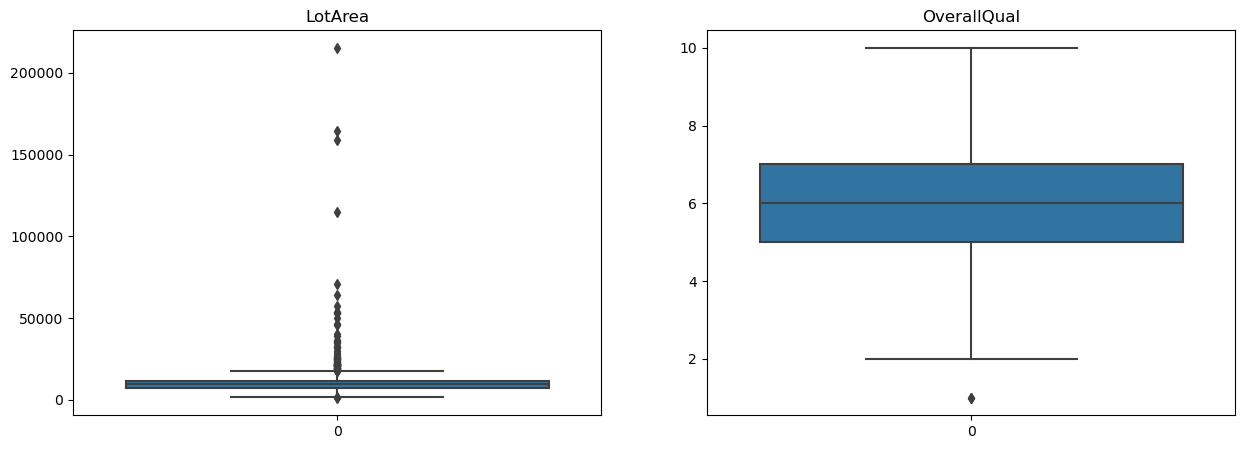

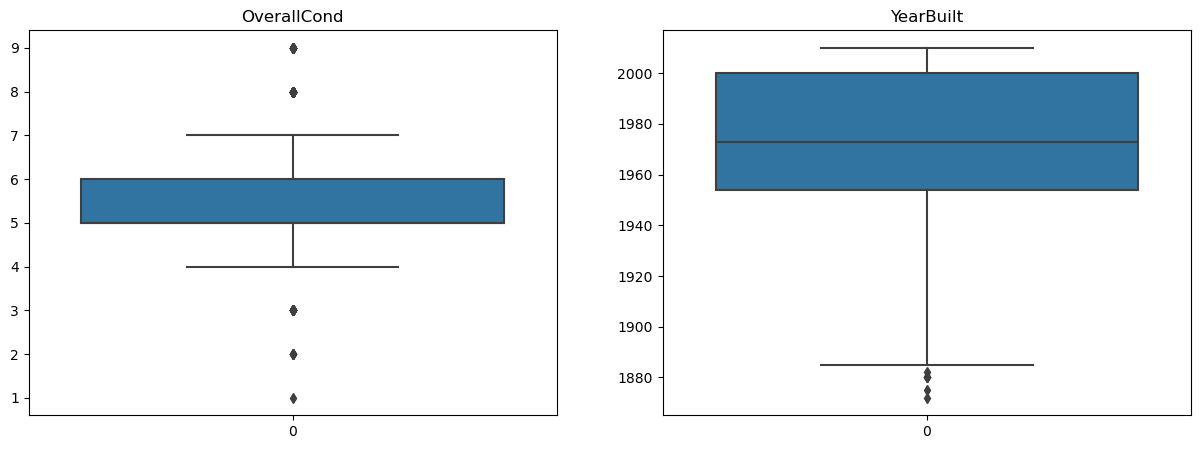

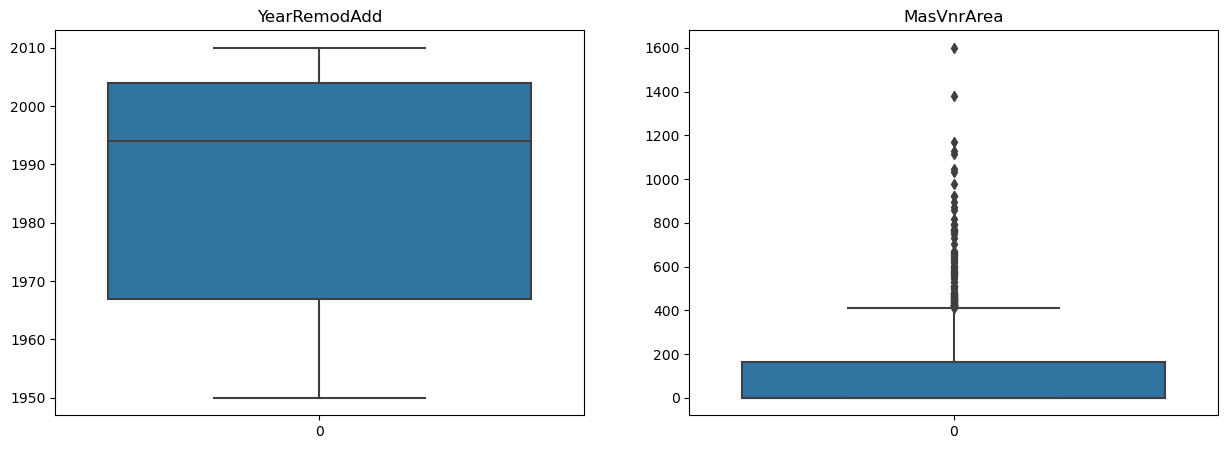

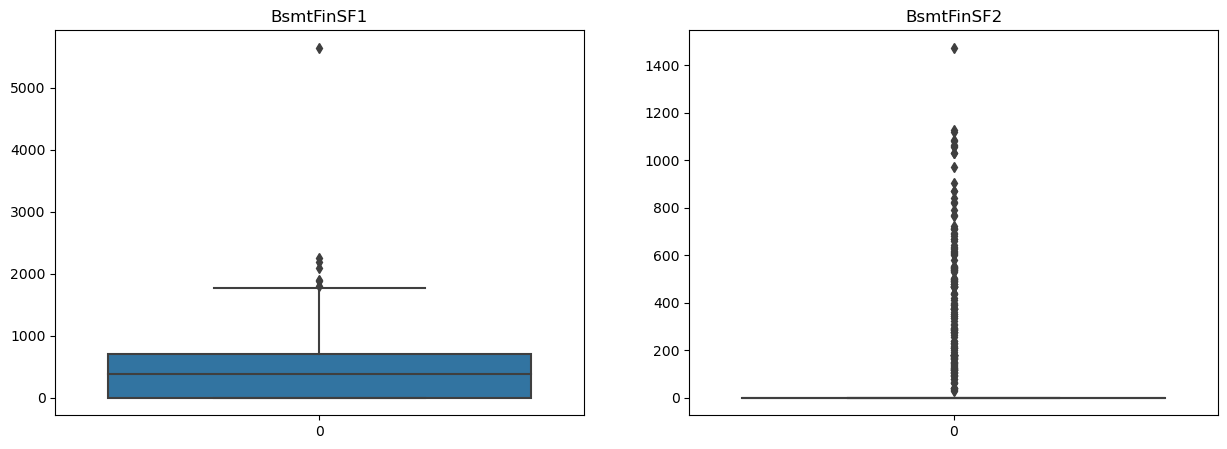

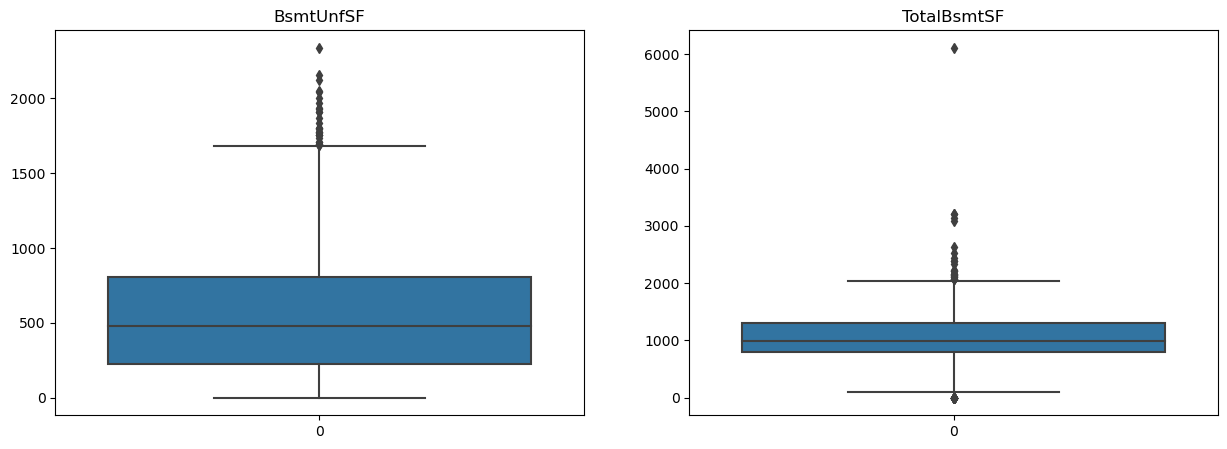

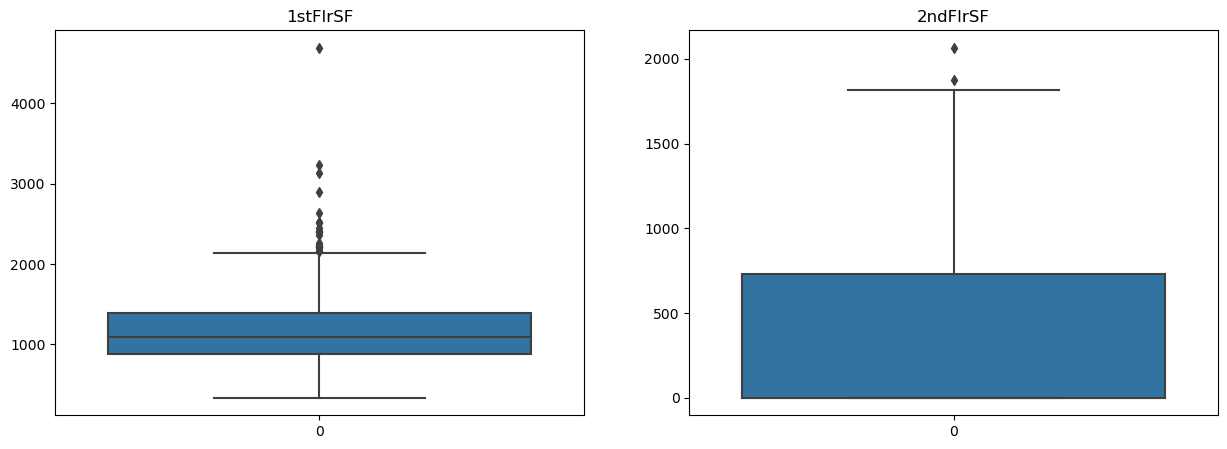

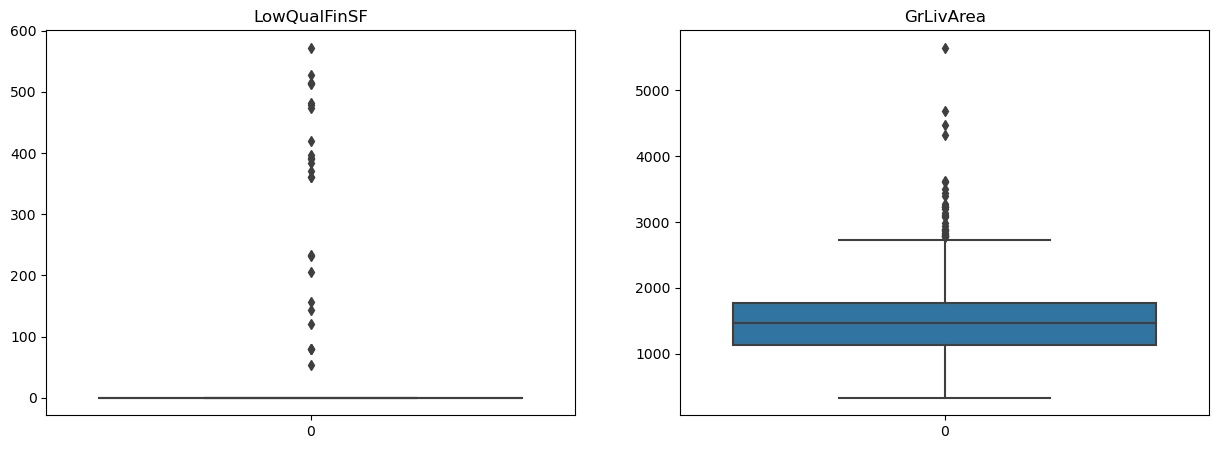

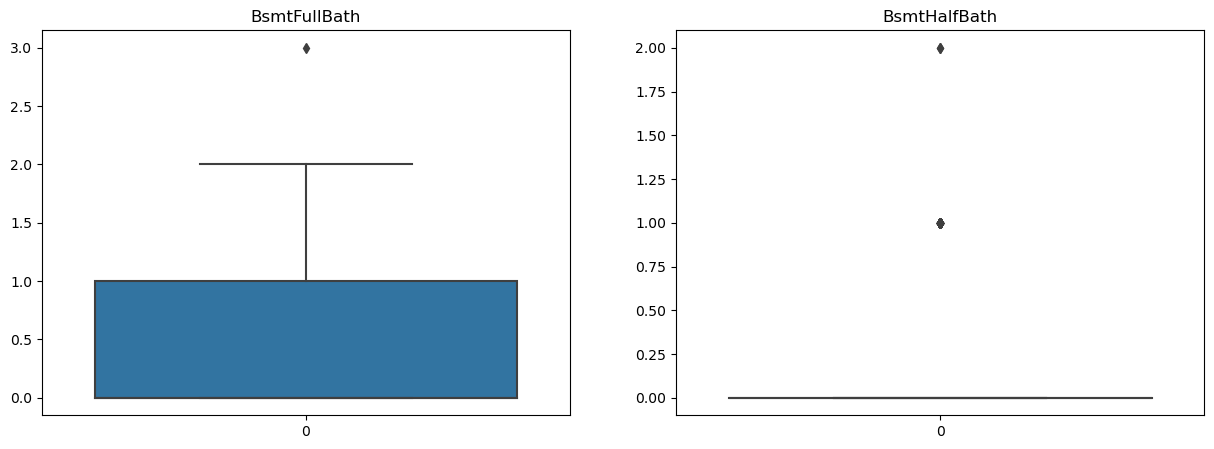

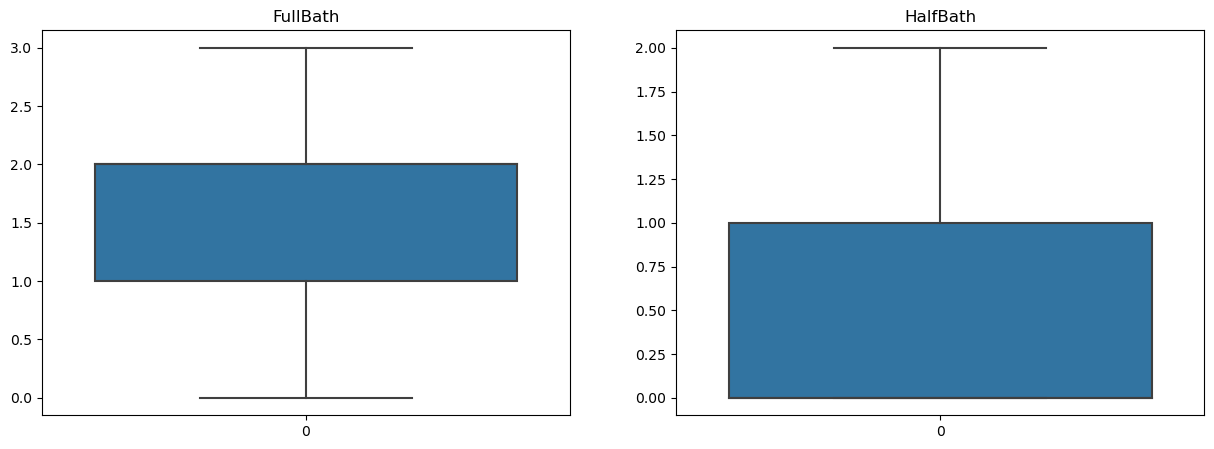

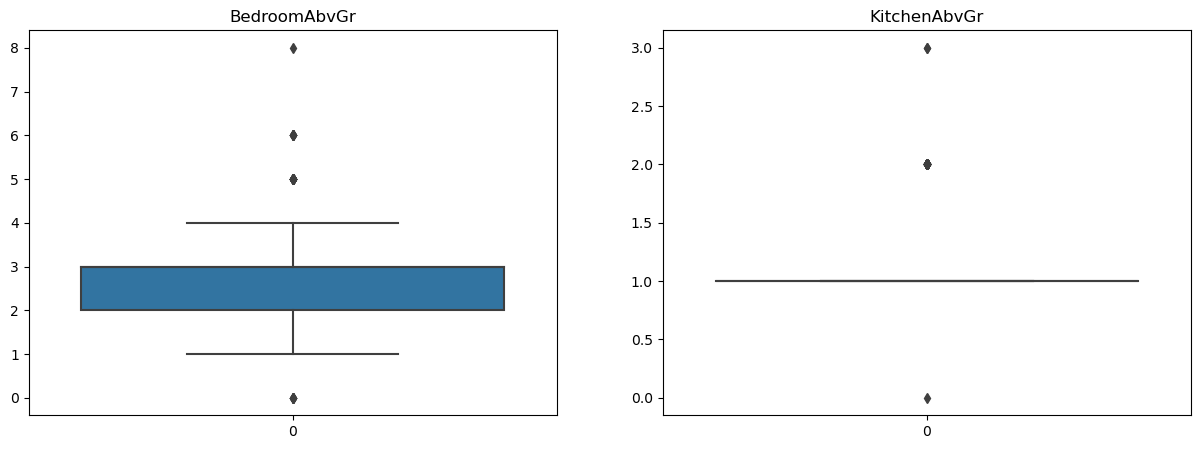

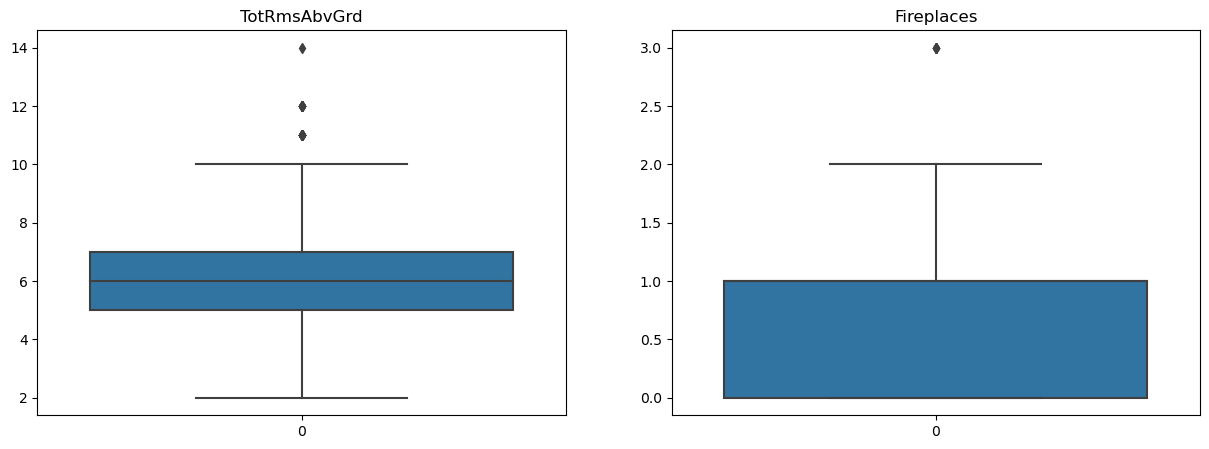

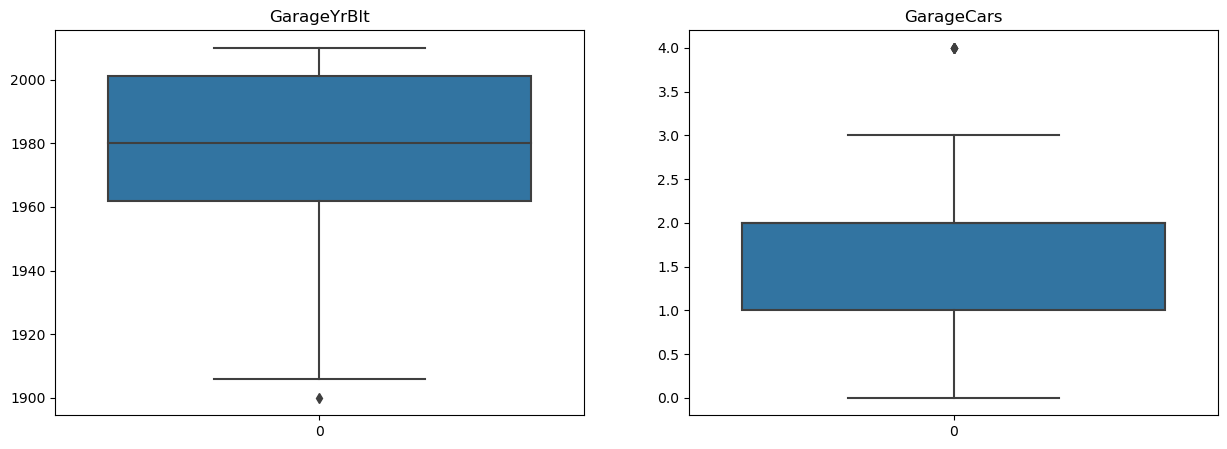

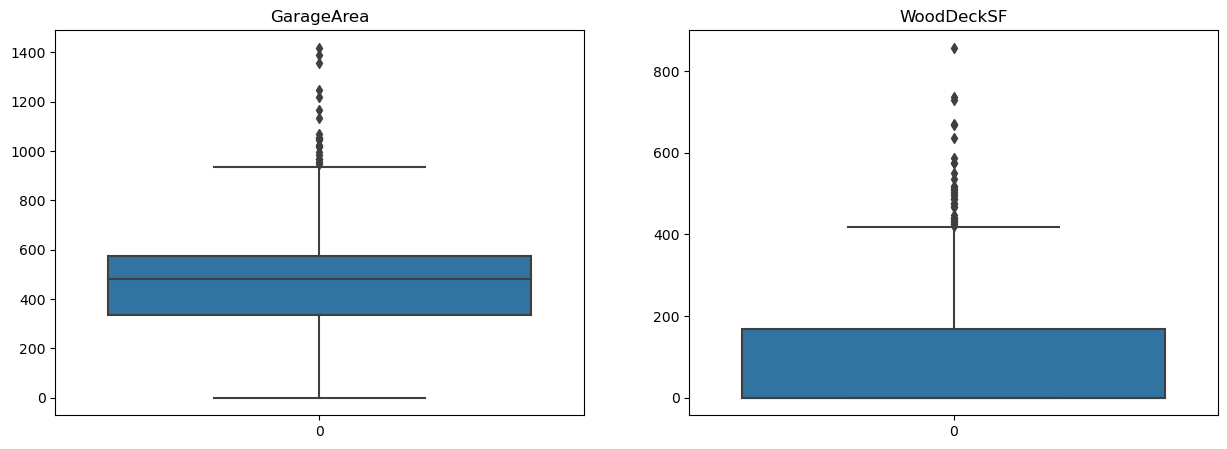

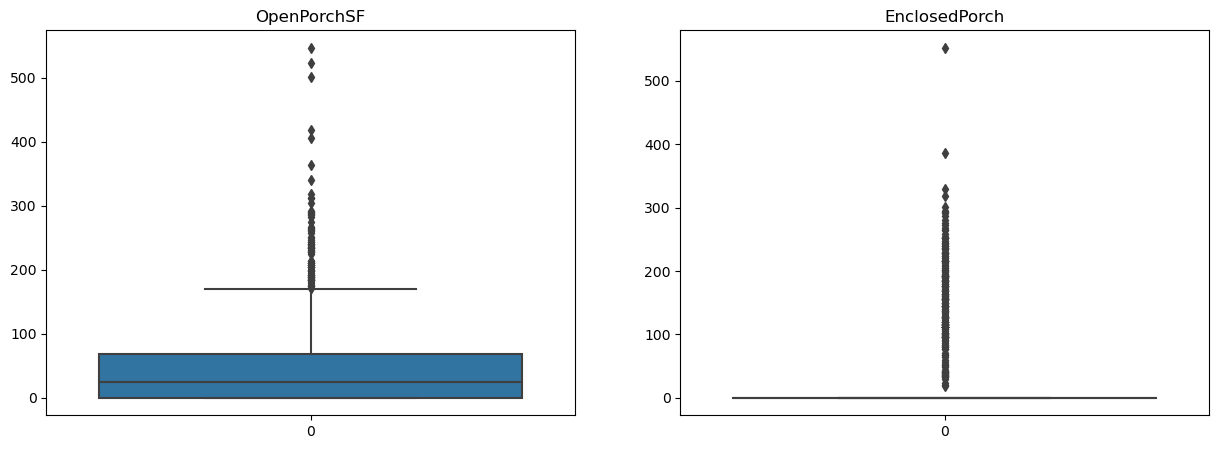

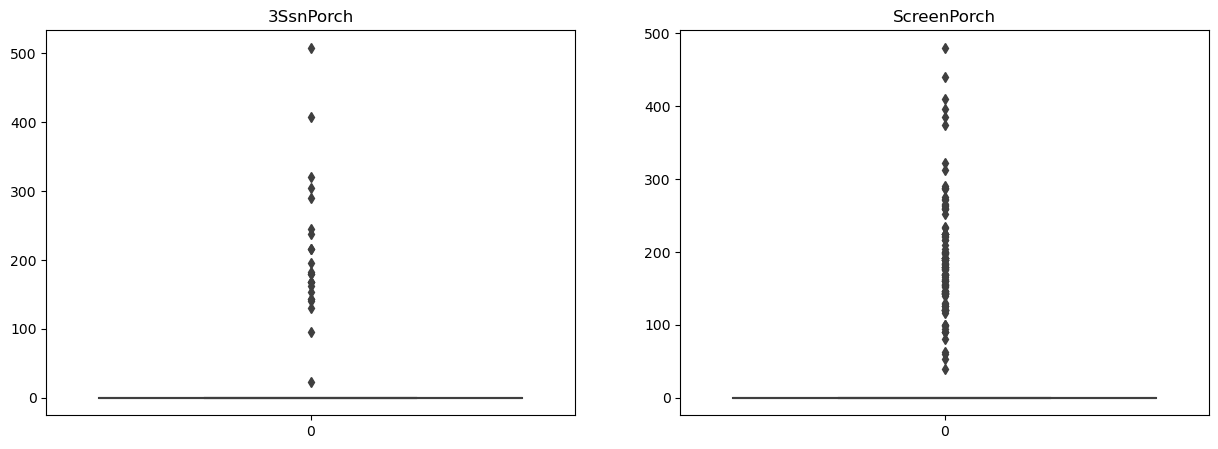

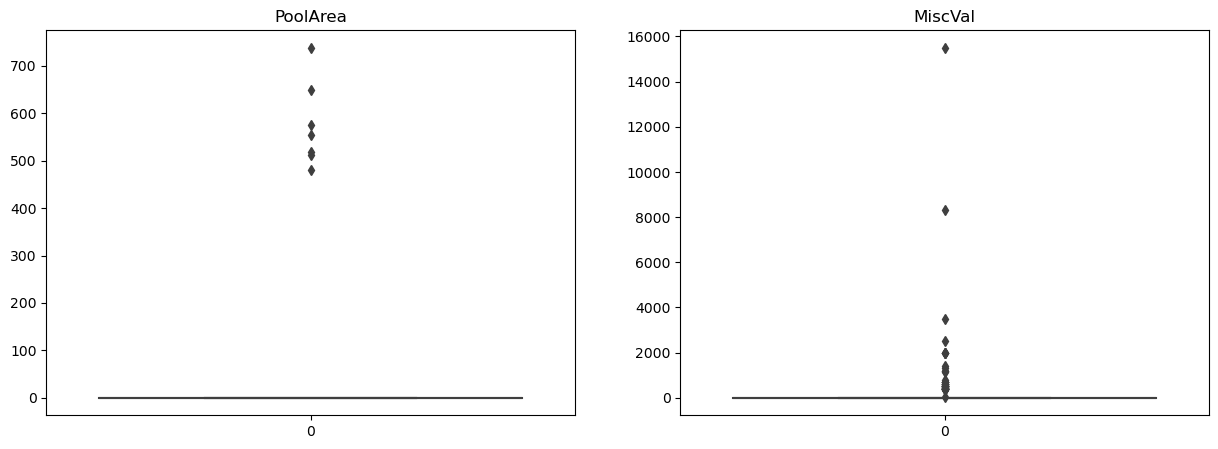

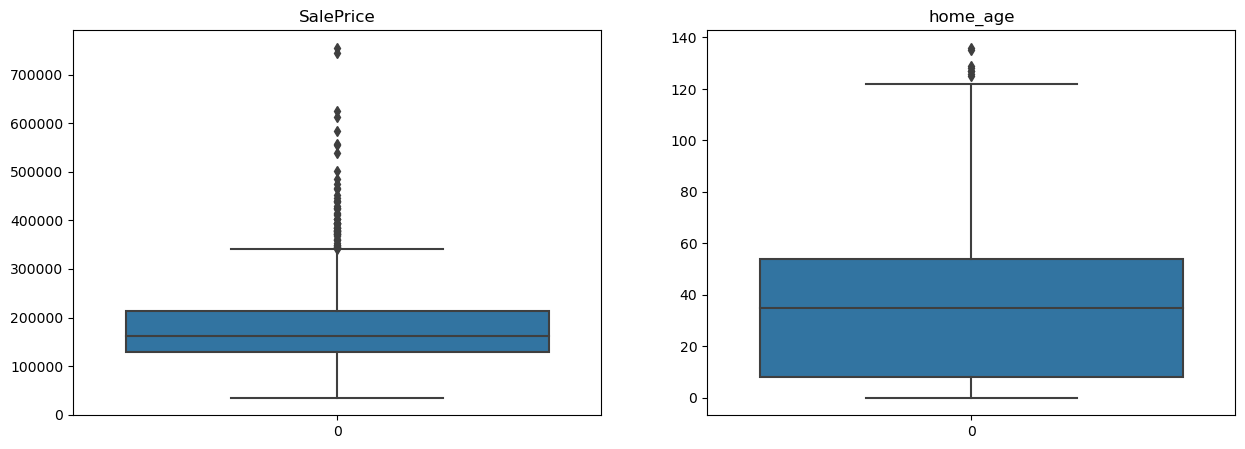

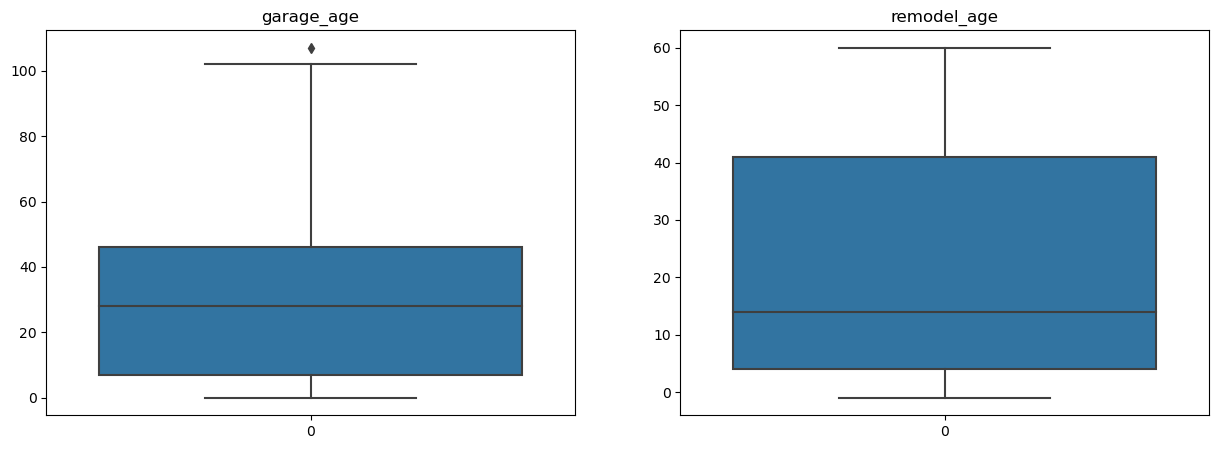

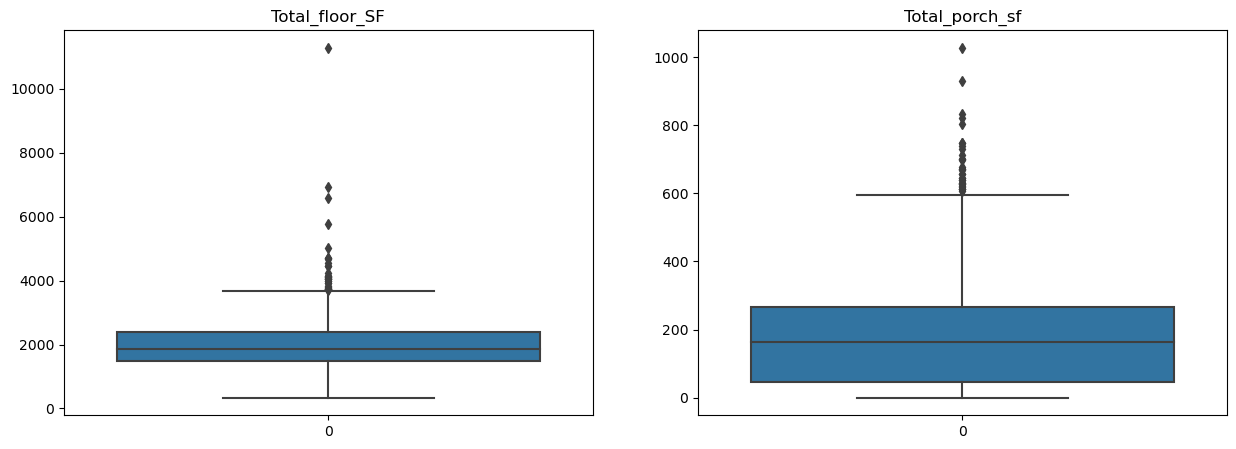

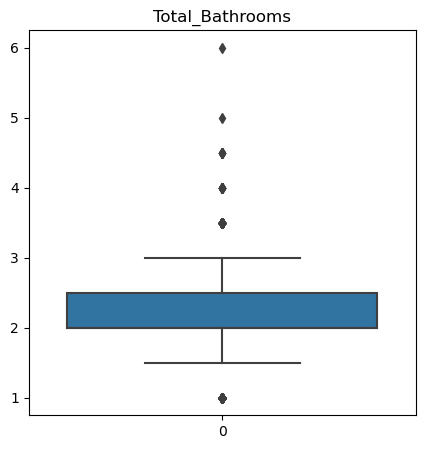

In [31]:
# Draw box plot for all the numeric columns in the dataframe

len_num_cols = len(num_cols)
for i in range(0, len_num_cols-1, 2):
    # Set the figure size to a standard so that it will be easy for viewing
    plt.figure(figsize=(15,5))
    # Set the subplot index
    plt.subplot(1,2,1)
    # Calling box plot
    sns.boxplot(home_data_clean[num_cols[i]])
    # Set the title of subplot
    plt.title(num_cols[i])
    # Set the subplot index
    plt.subplot(1,2,2)
    # Calling box plot
    sns.boxplot(home_data_clean[num_cols[i+1]])
    # Set the title of subplot
    plt.title(num_cols[i+1])
    plt.show()

# Plot the last column in the list since the above for loop will not handle it
# Set the figure size to a standard so that it will be easy for viewing
plt.figure(figsize=(5,5))
# Calling box plot
sns.boxplot(home_data_clean[num_cols[len_num_cols-1]])
# Set the title of plot
plt.title(num_cols[len_num_cols-1])
plt.show()

> From the plots, we could see that many columns have outliers. Let's drop the values below 25 percentile and above 99 percentile as outliers across all the numeric columns.

In [32]:
# Function which drops outliers : lower quantile is .25, upper quantile is .99
# df -> Input dataframe
def drop_outliers(df):
    for col in df:
        if col in num_cols:
            Q1 = df[col].quantile(.25)
            Q3 = df[col].quantile(.99)
            IQR = Q3-Q1
            df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df

# Store the output in a new variable
home_data = drop_outliers(home_data_clean)
home_data.shape

(1440, 78)

> Now, we could see that we have **removed 99 rows** from initial *1460 rows* in raw data. This is around **6.7%** of data which is acceptable.

---
<a id='datamanipulate_labels'></a>
### 2.6 Labelling categorical variables

In [33]:
# Update the column classification based on types
classify_cols(home_data)

Numeric columns:  ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms'] 

Categoric columns:  ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 

In [34]:
# Print unique values in each categoric columns
for col in cat_cols:
    print("Unique values in {0}  : {1}".format(col, str(home_data[col].unique())))

Unique values in MSSubClass  : [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
Unique values in MSZoning  : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in Alley  : ['None' 'Grvl' 'Pave']
Unique values in LotShape  : ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in LandContour  : ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in LotConfig  : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in LandSlope  : ['Gtl' 'Mod' 'Sev']
Unique values in Neighborhood  : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in Condition1  : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in BldgType  : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in HouseStyle  : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Unique values in Ro

In [35]:
# Label the MoSold column
home_data['MoSold'] = home_data['MoSold'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [36]:
# Print unique values in each categoric columns
for col in cat_cols:
    print("Unique values in {0}  : {1}".format(col, str(home_data[col].unique())))

Unique values in MSSubClass  : [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
Unique values in MSZoning  : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in Alley  : ['None' 'Grvl' 'Pave']
Unique values in LotShape  : ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in LandContour  : ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in LotConfig  : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in LandSlope  : ['Gtl' 'Mod' 'Sev']
Unique values in Neighborhood  : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in Condition1  : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in BldgType  : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in HouseStyle  : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Unique values in Ro

---
---

<a id='visual'></a>
## Step 3: Visualising the Data
<a id='visual_category'></a>
### 3.1 Categorical variable with target variable

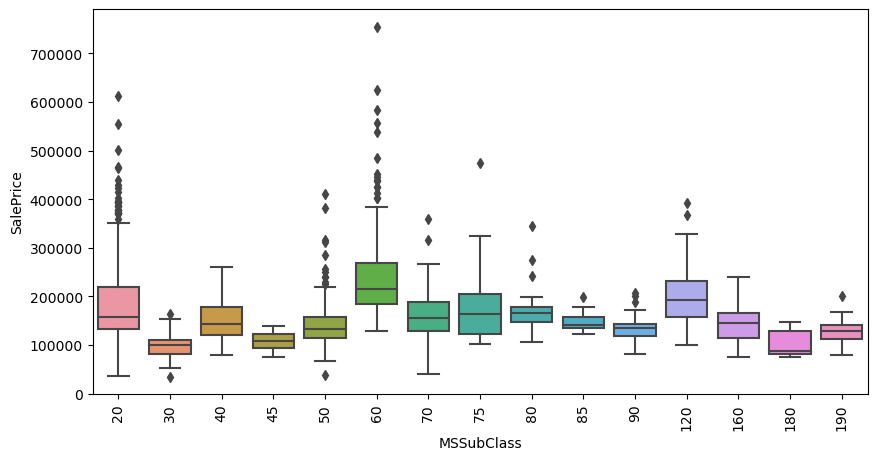

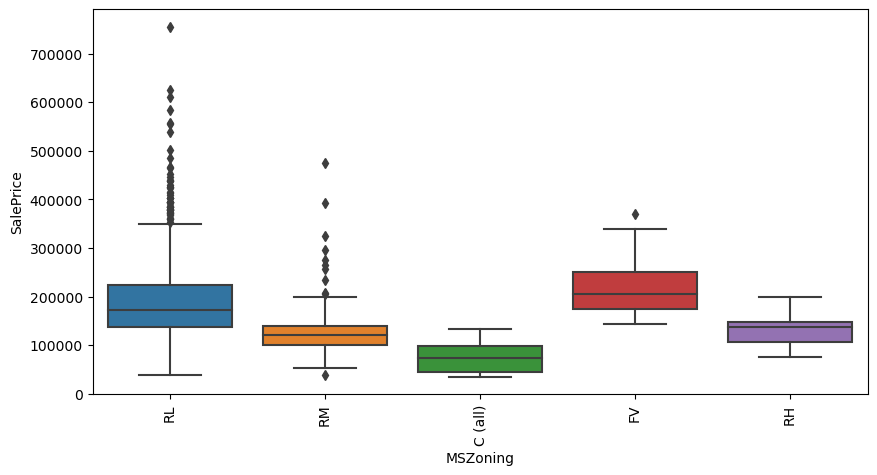

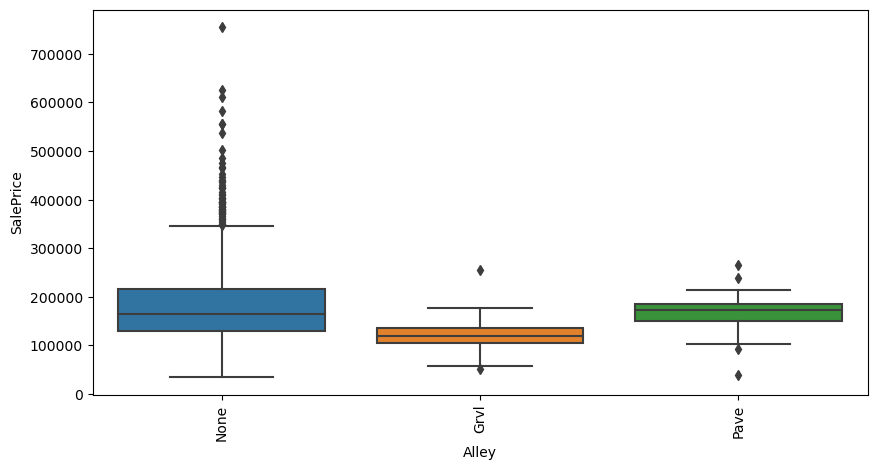

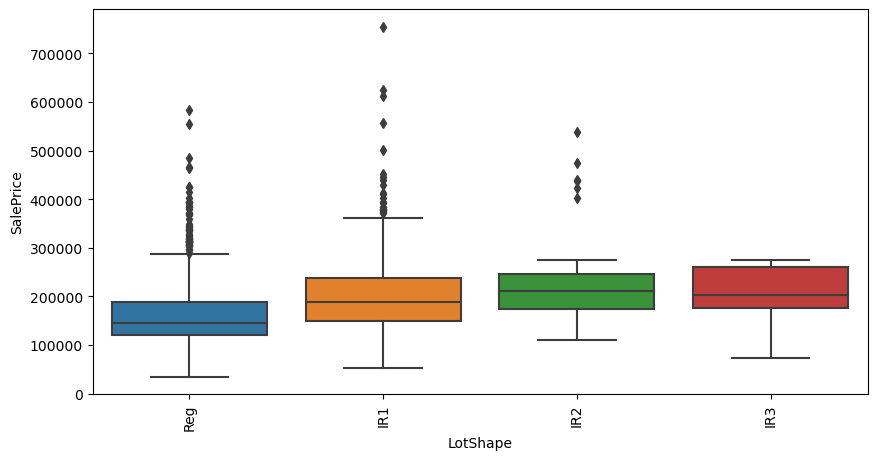

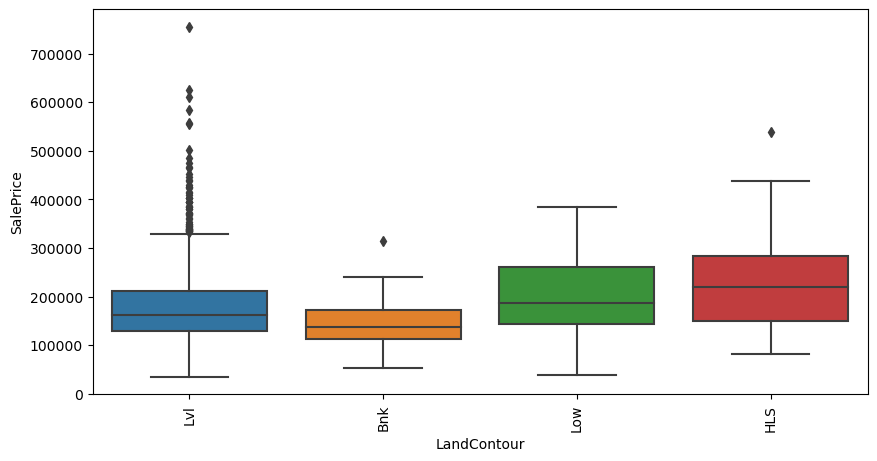

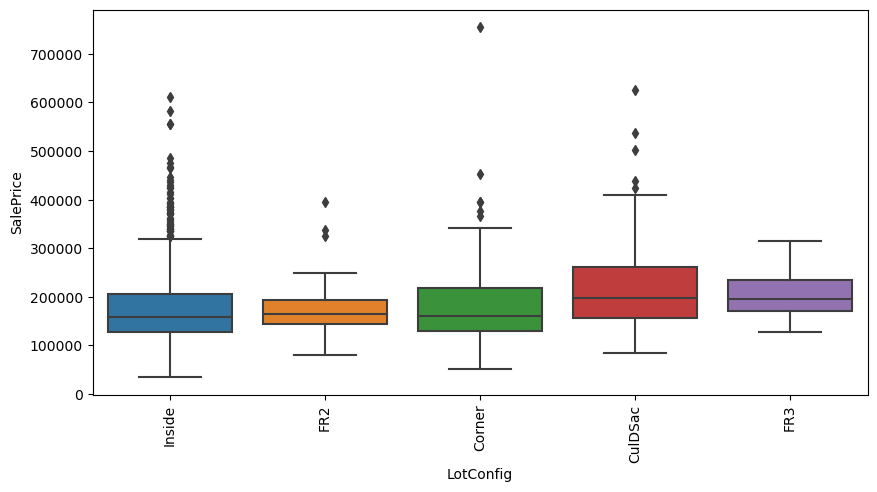

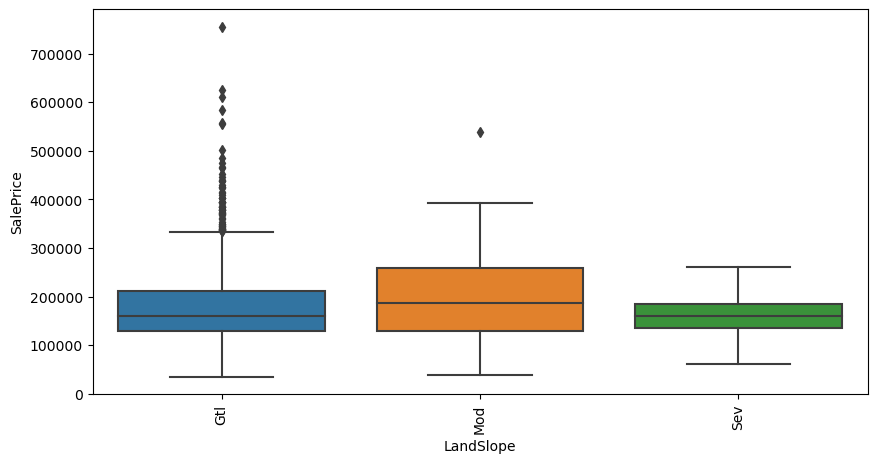

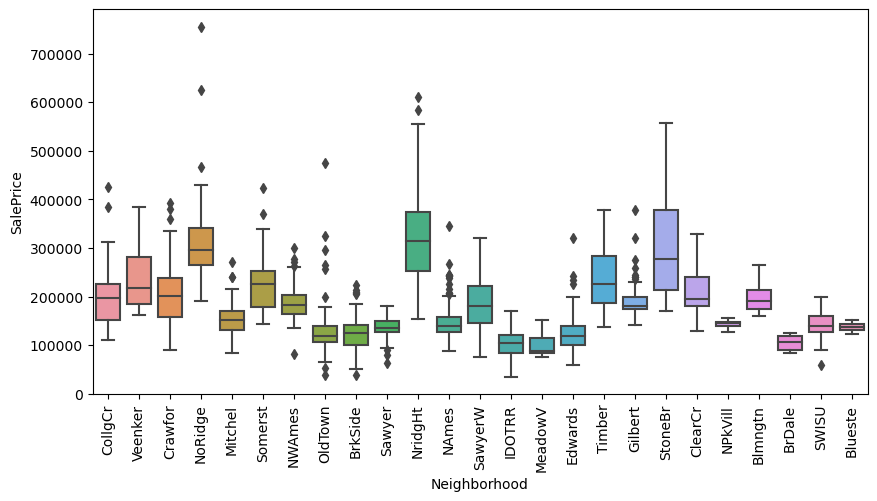

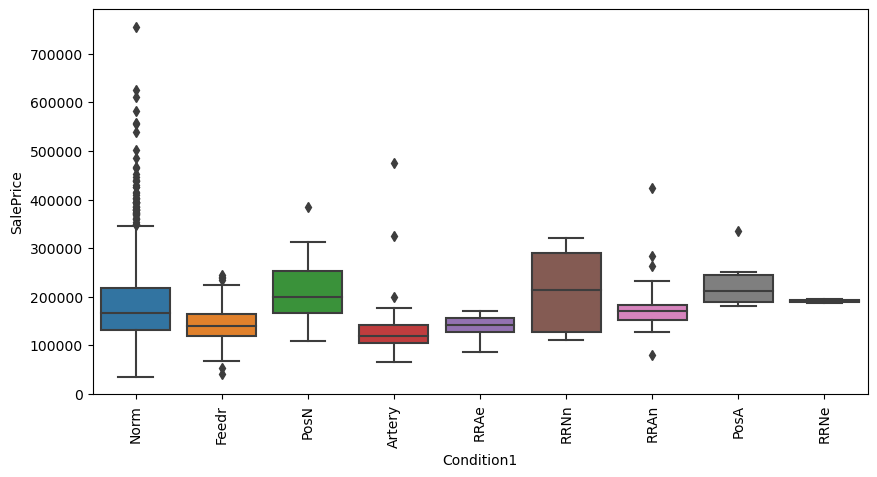

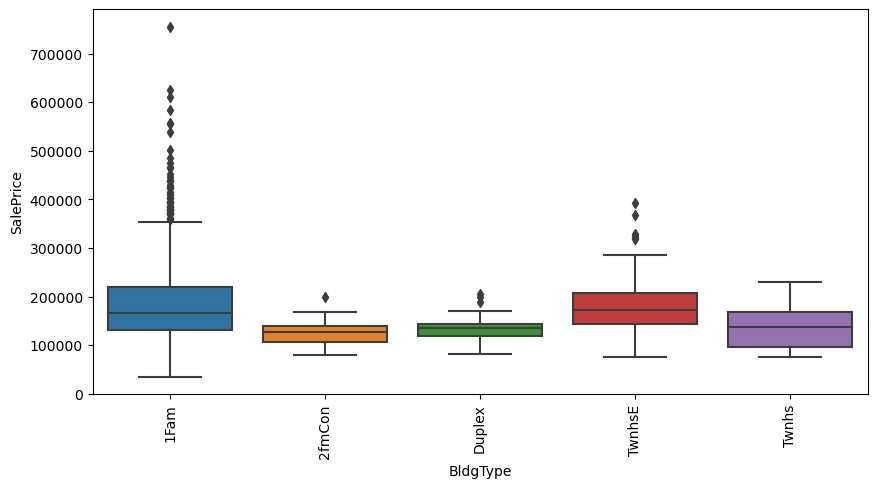

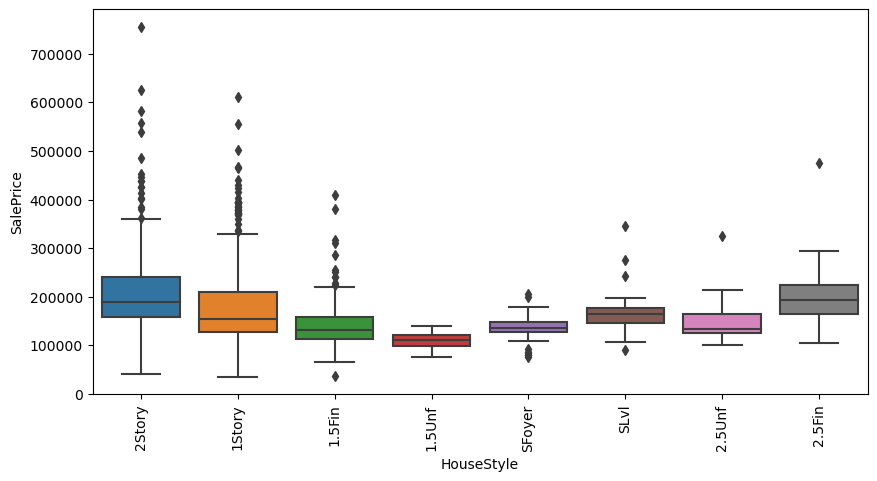

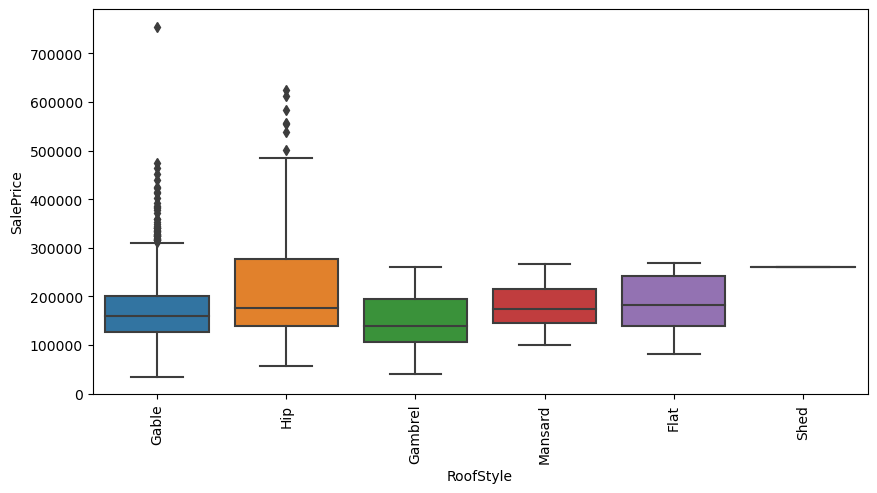

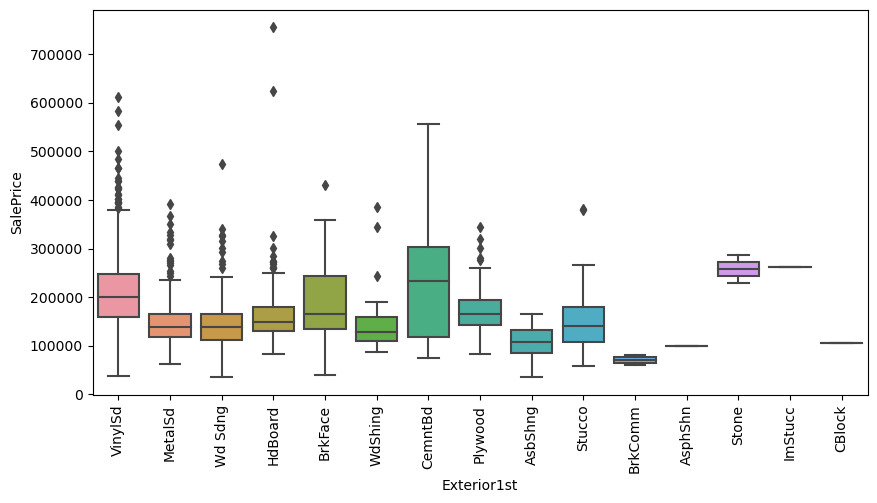

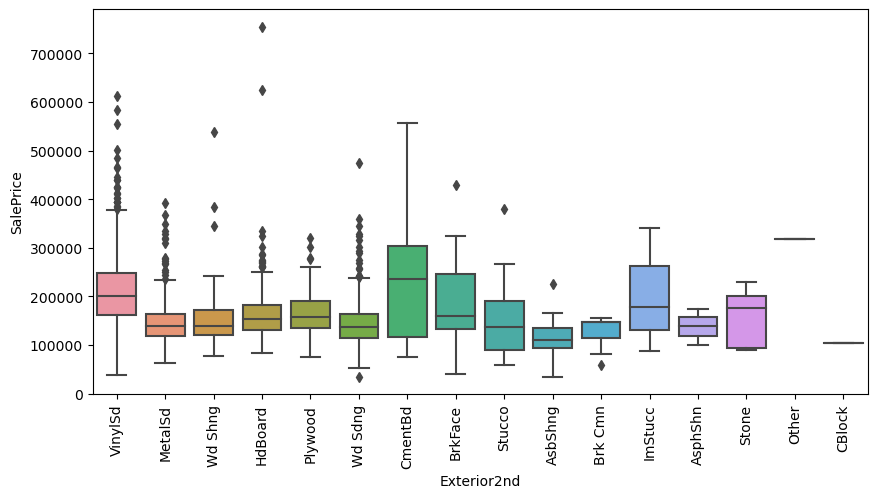

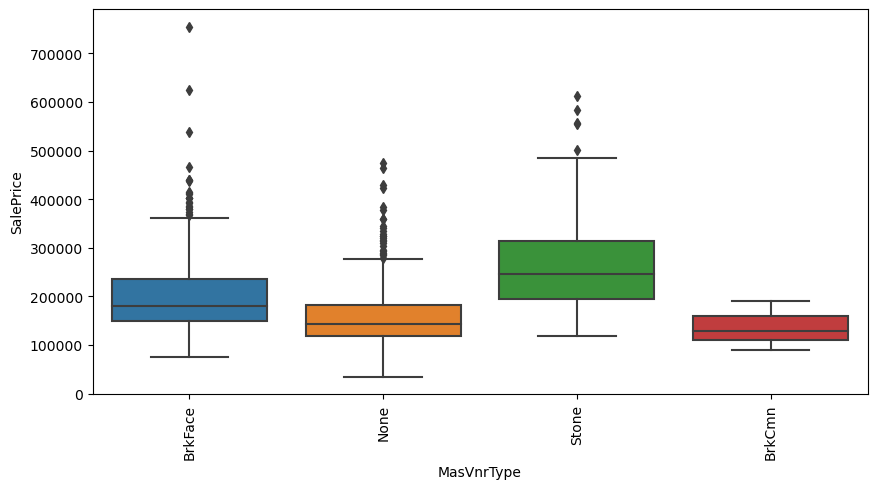

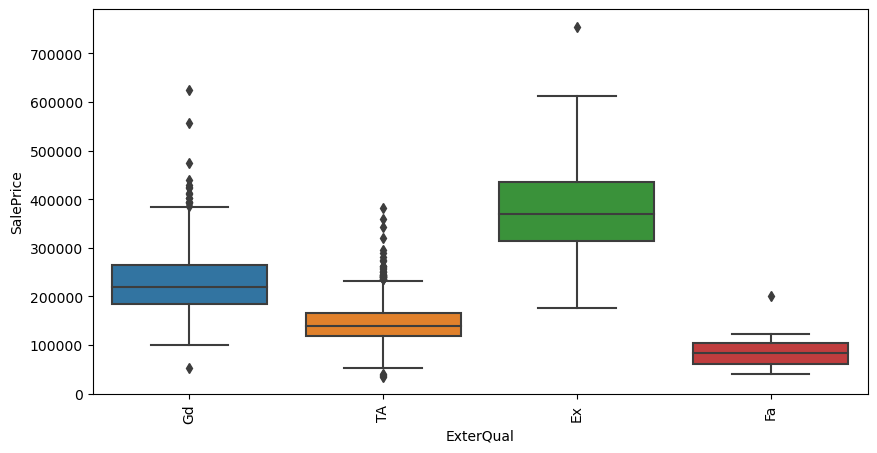

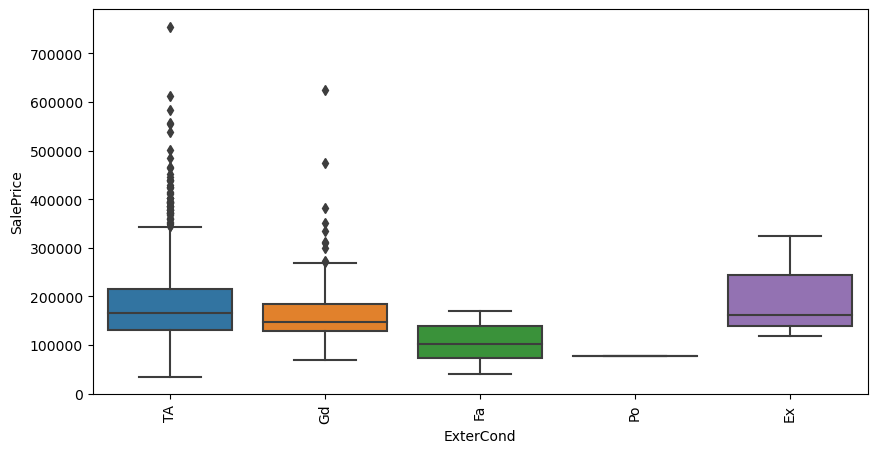

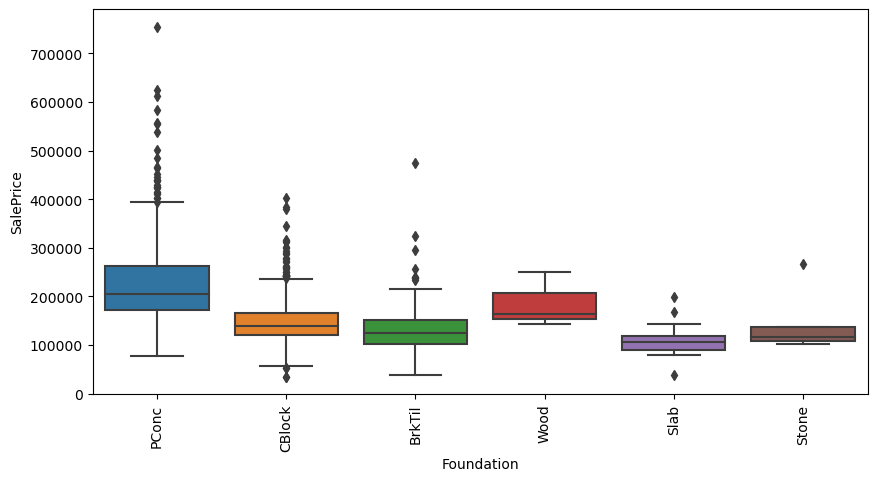

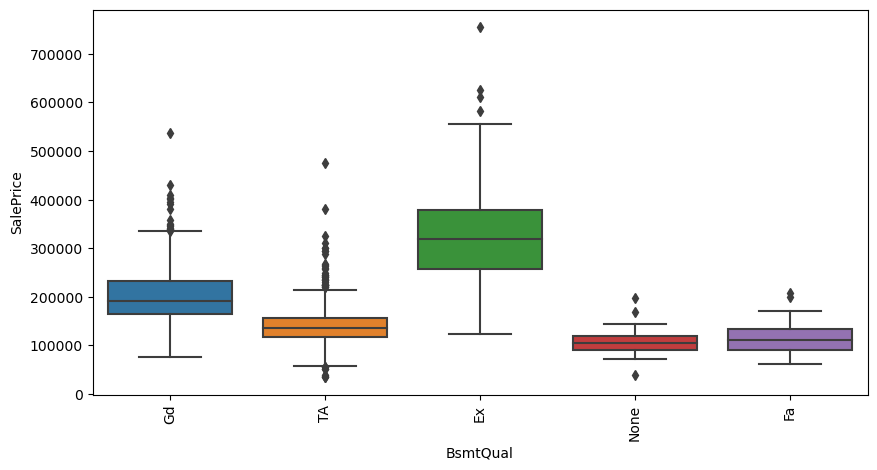

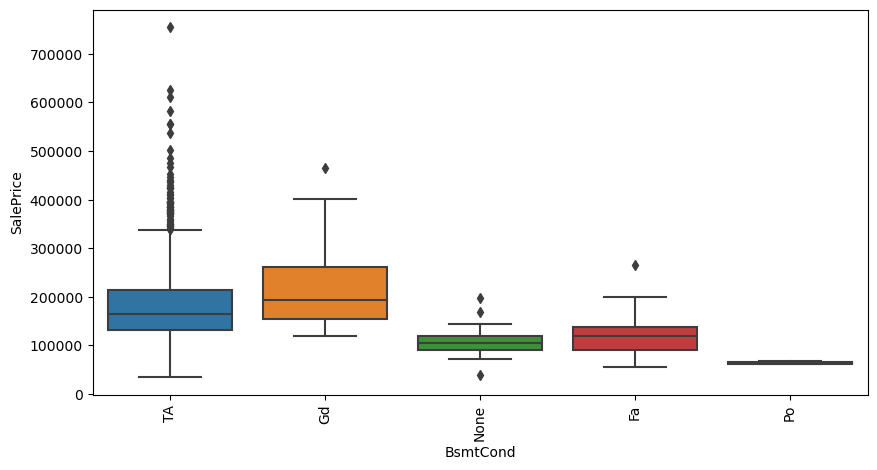

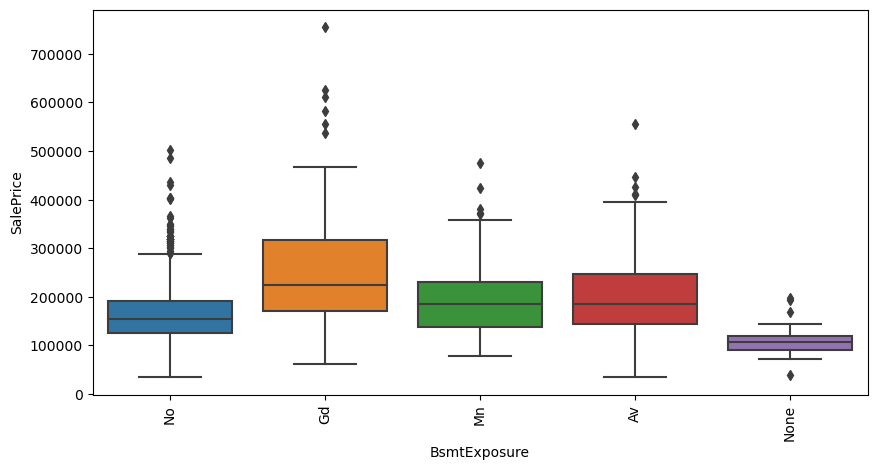

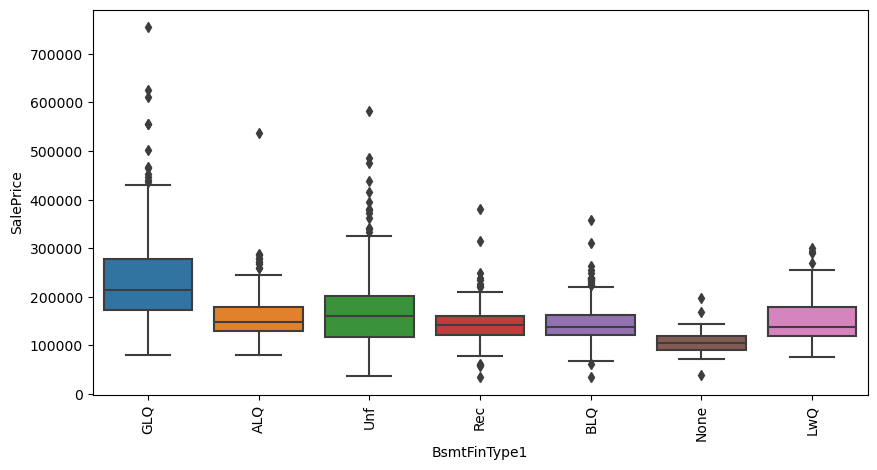

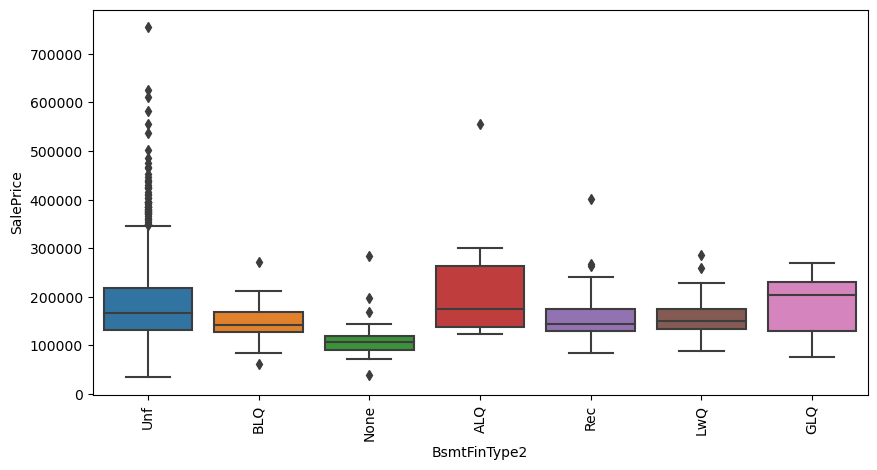

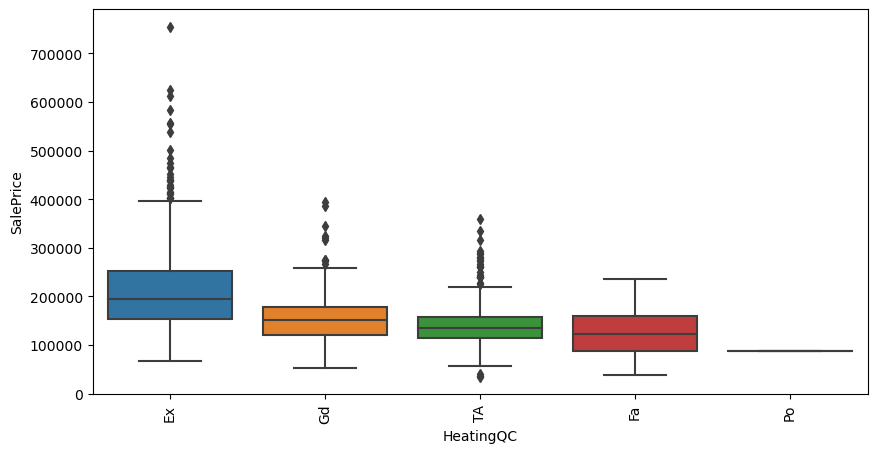

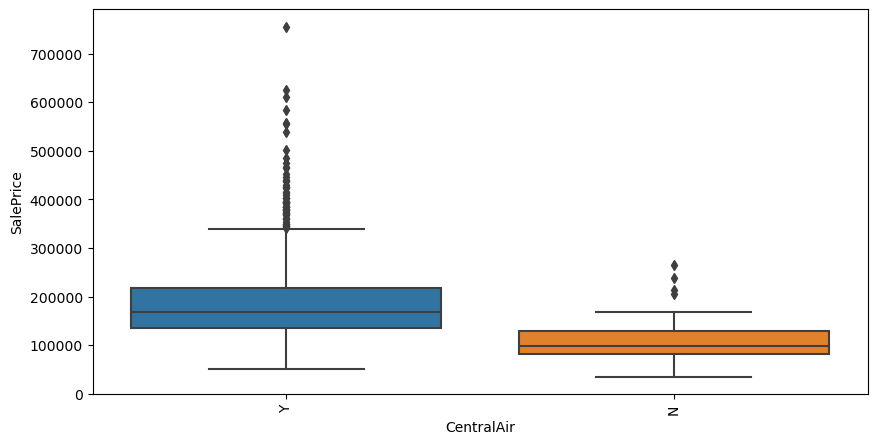

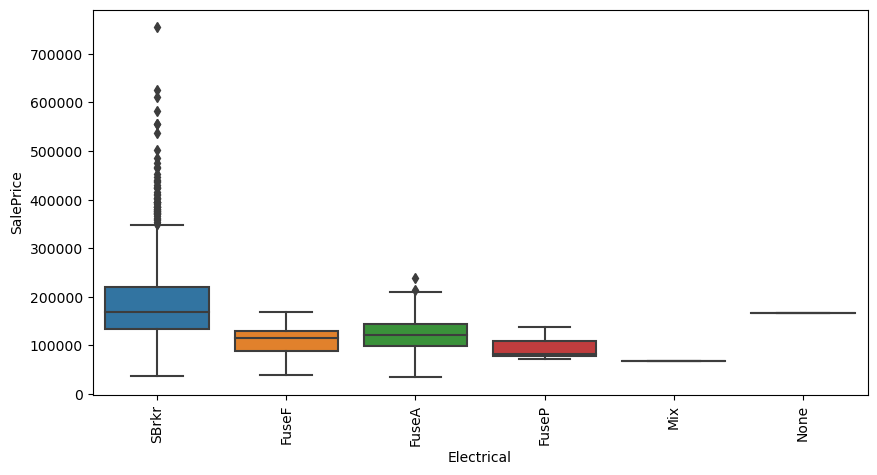

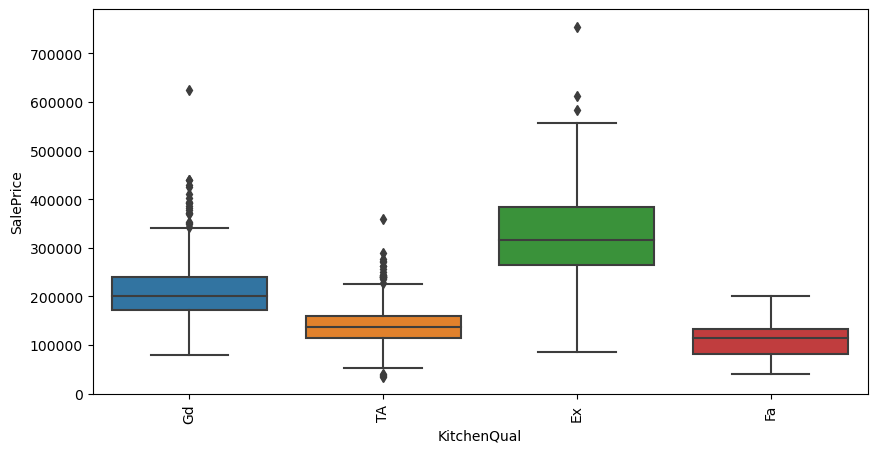

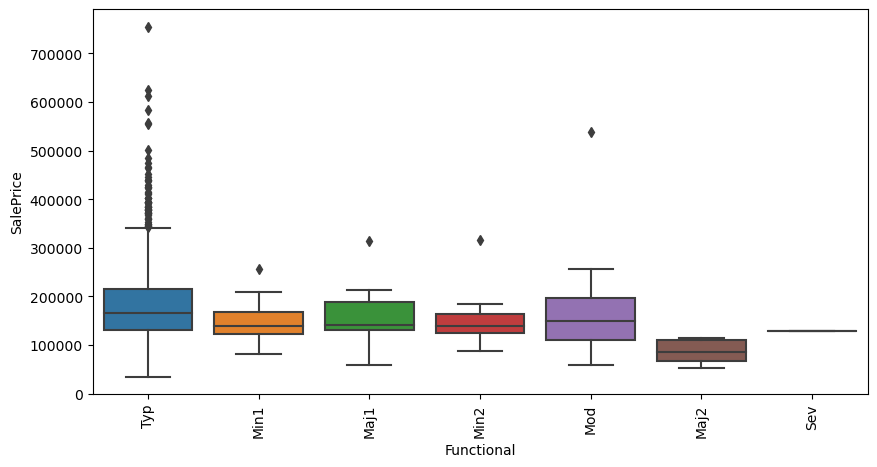

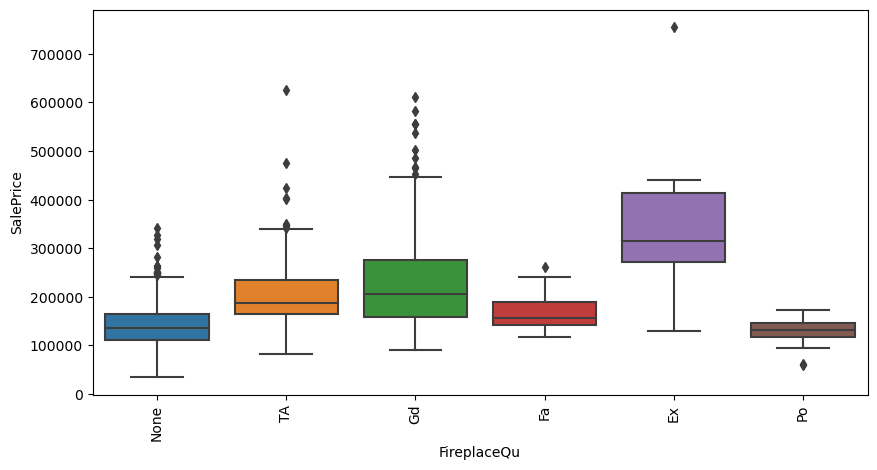

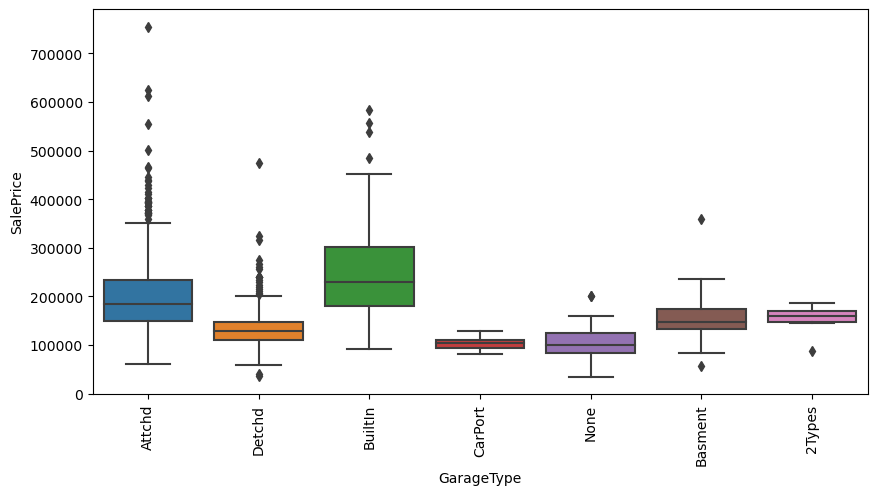

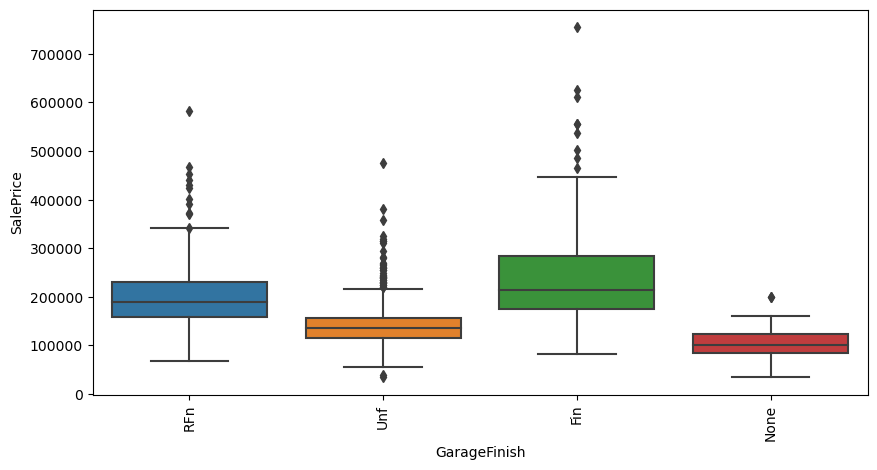

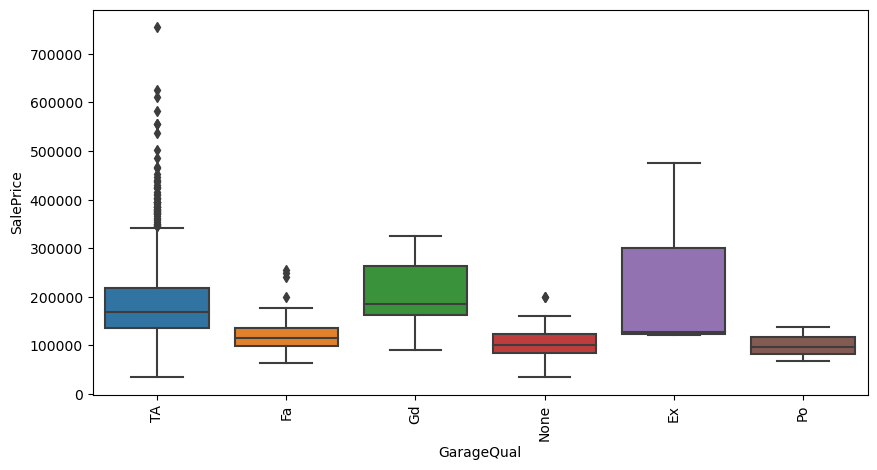

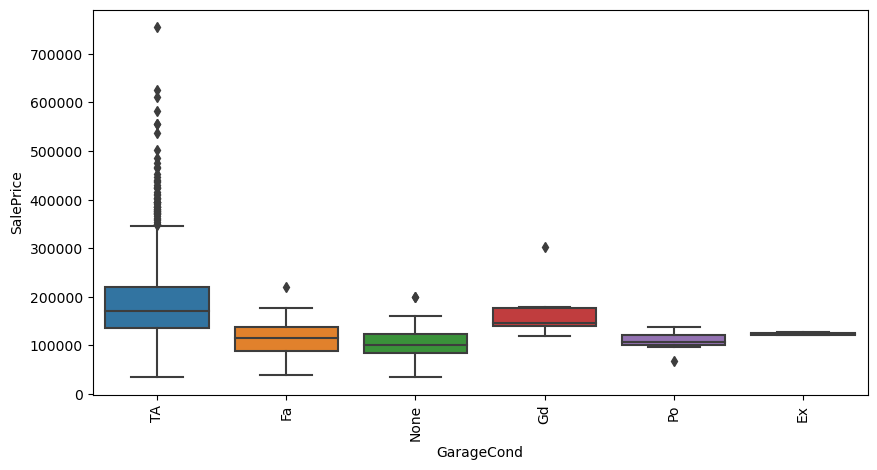

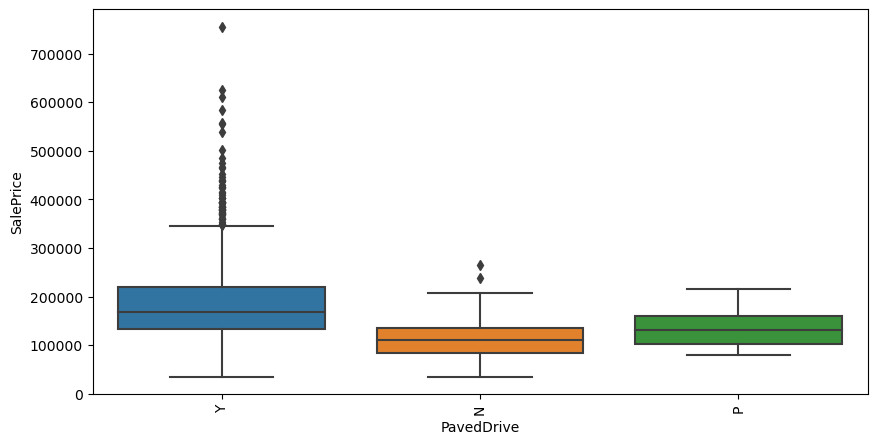

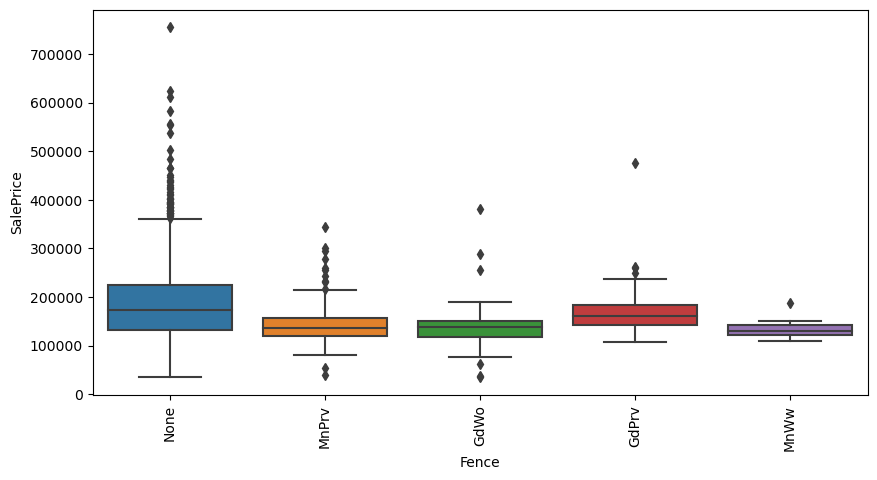

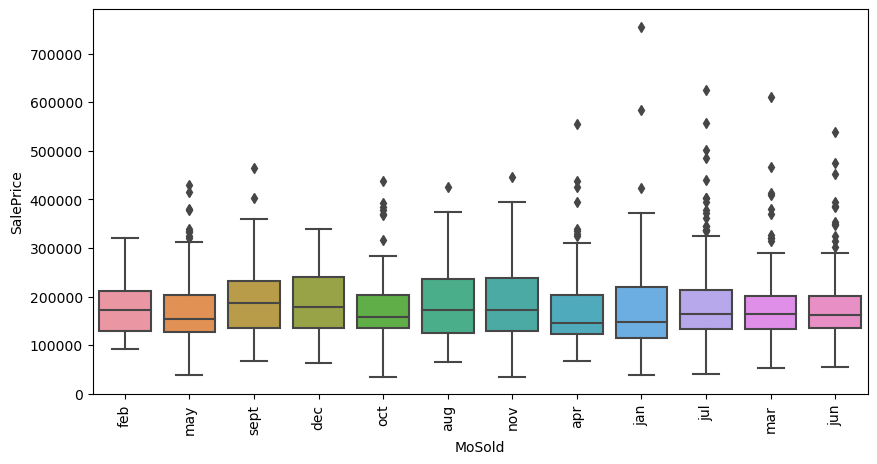

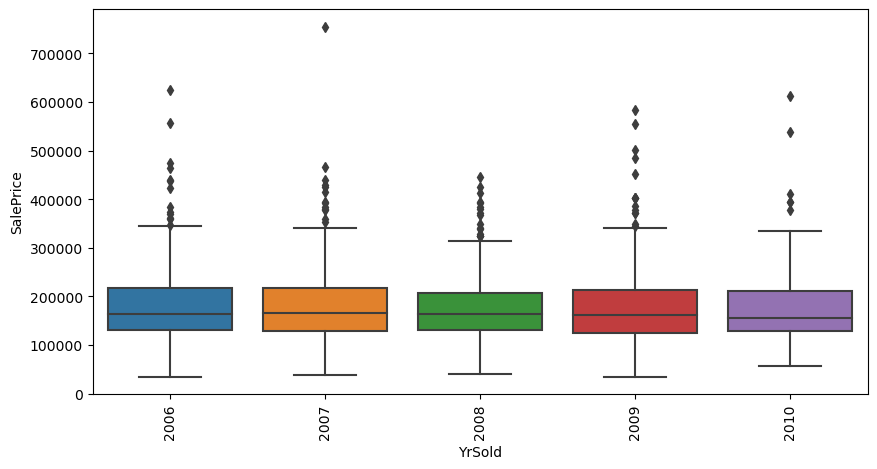

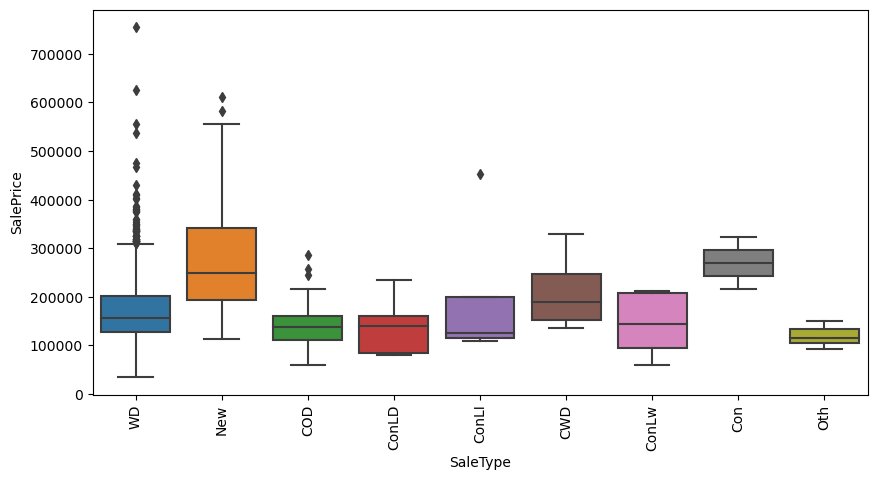

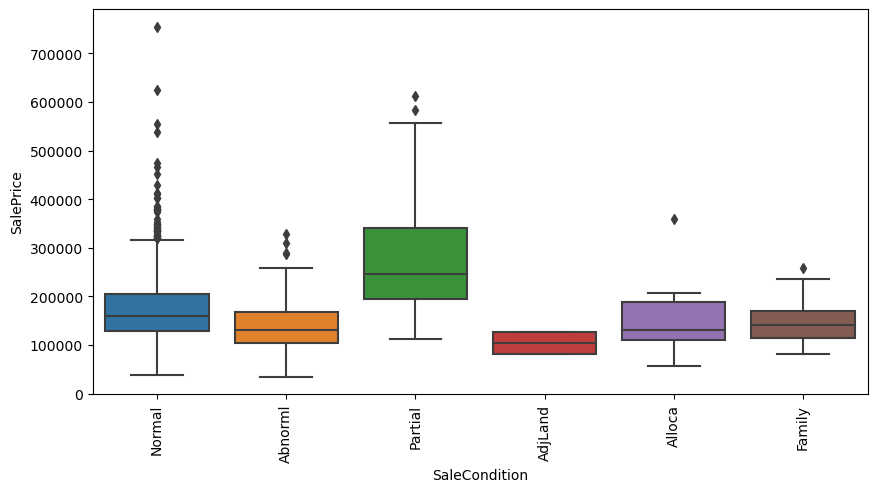

In [37]:
# Draw box plot for Sale price against each categoric column
for col in cat_cols:
    # Set the figure size to a standard so that it will be easy for viewing
    plt.figure(figsize=(10,5))
    # Calling box plot
    sns.boxplot(home_data, x=col, y="SalePrice")
    # Rotate xticks by 90 degree rotation
    plt.xticks(rotation=90)
    plt.show()

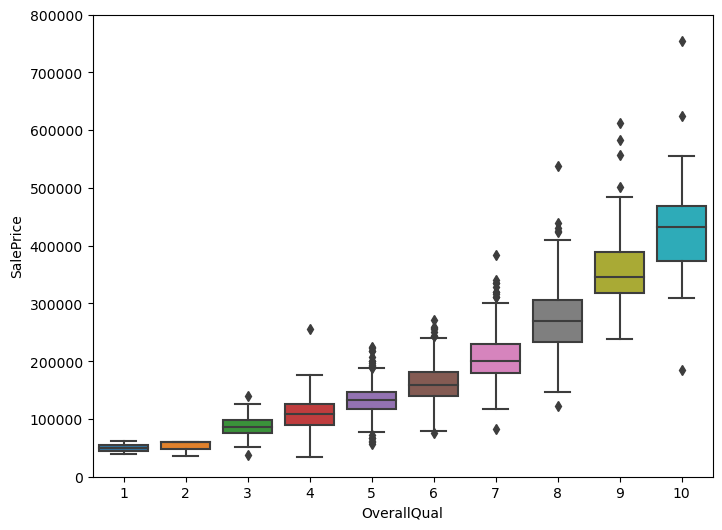

In [38]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([home_data['SalePrice'], home_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Inference:

Few of the inferences from the above plots,
- Houses with Excellent **'OverallQual'** are sold at *high* price.
- Houses with Excellent **'ExterQual'** are sold at *high* price.
- Houses with Excellent **'ExterCond'** are sold at *high* price.
- Houses with Excellent **'BsmtQual'** are sold at *high* price.
- Houses with Excellent **'KitchenQual'** are sold at *high* price.
- **'New'** houses are sold at *high* price.

---
<a id='visual_numeric'></a>
### 3.2 Numeric variables

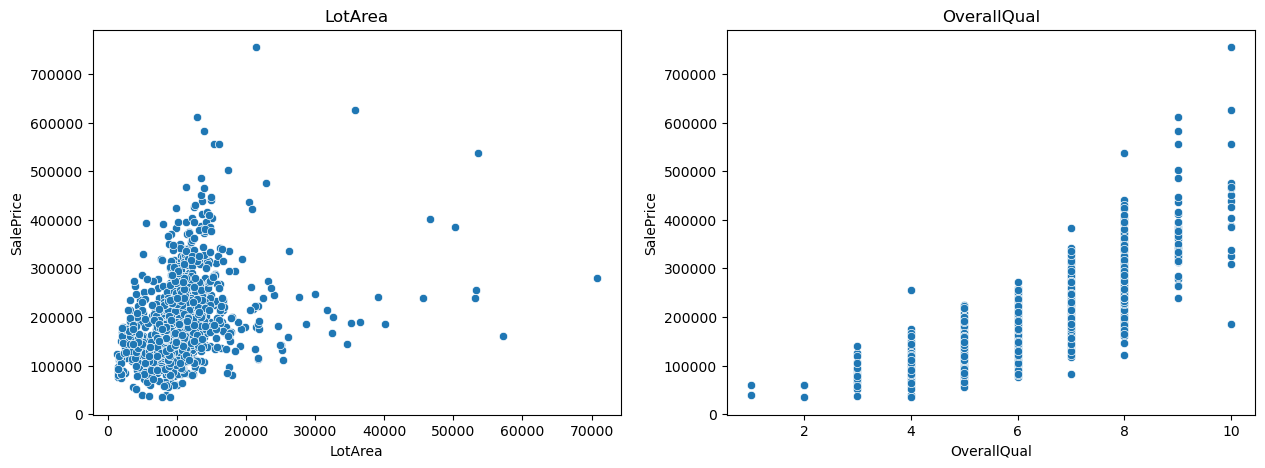

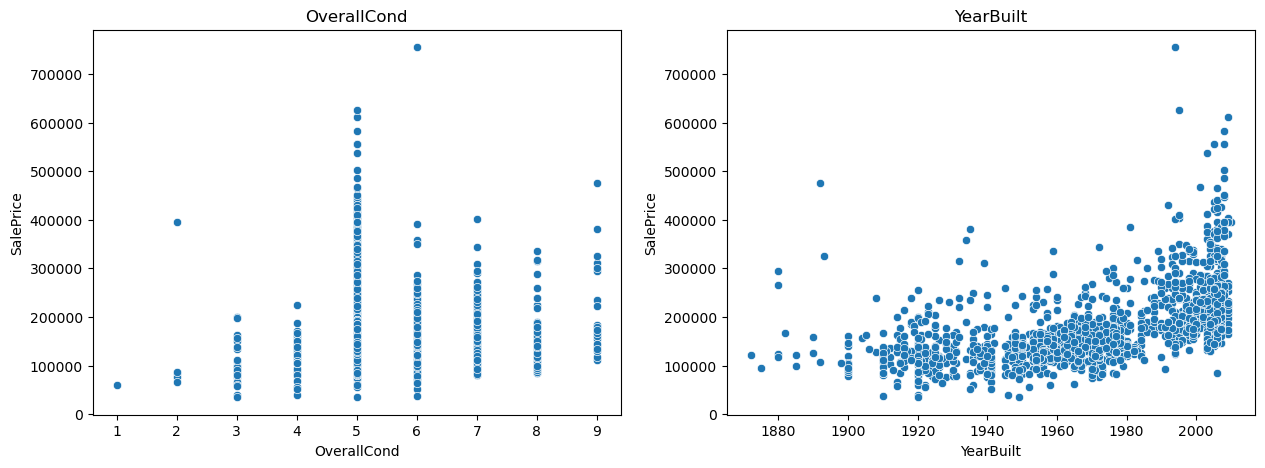

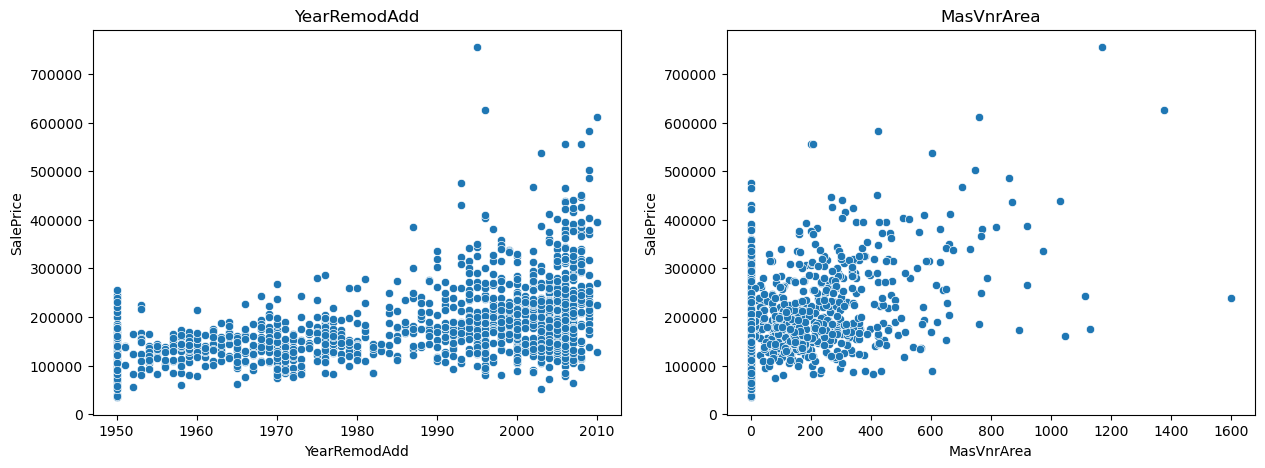

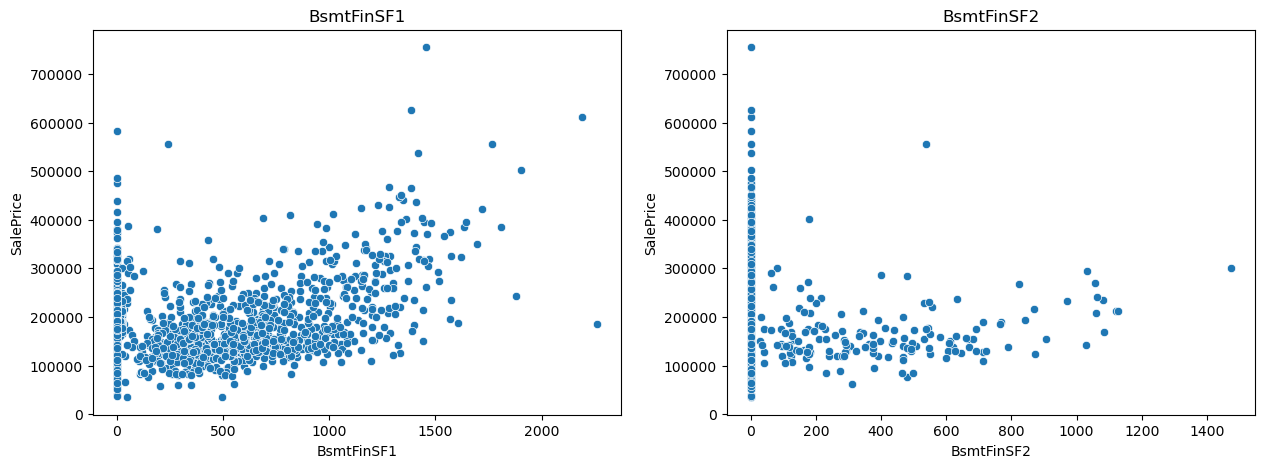

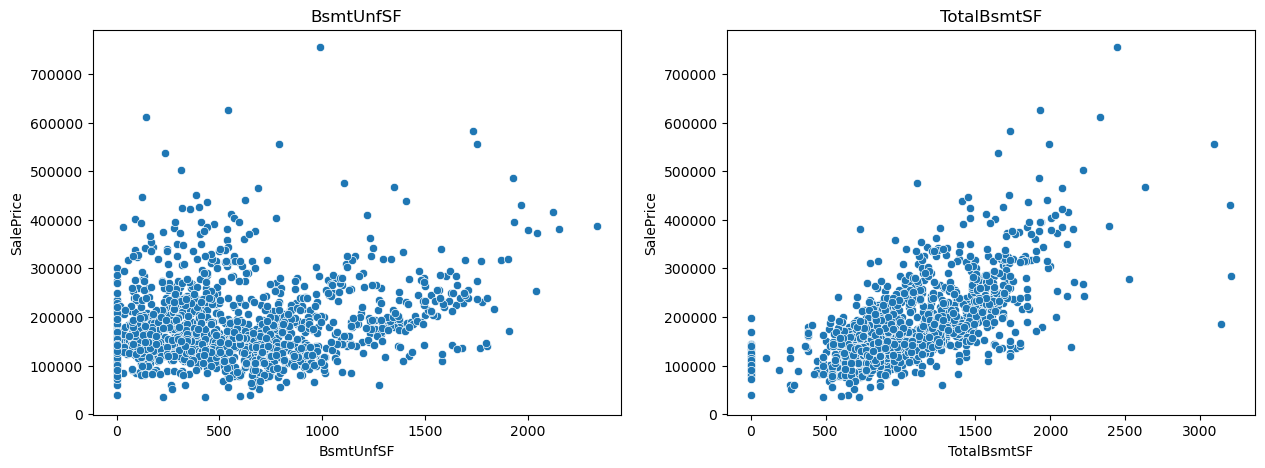

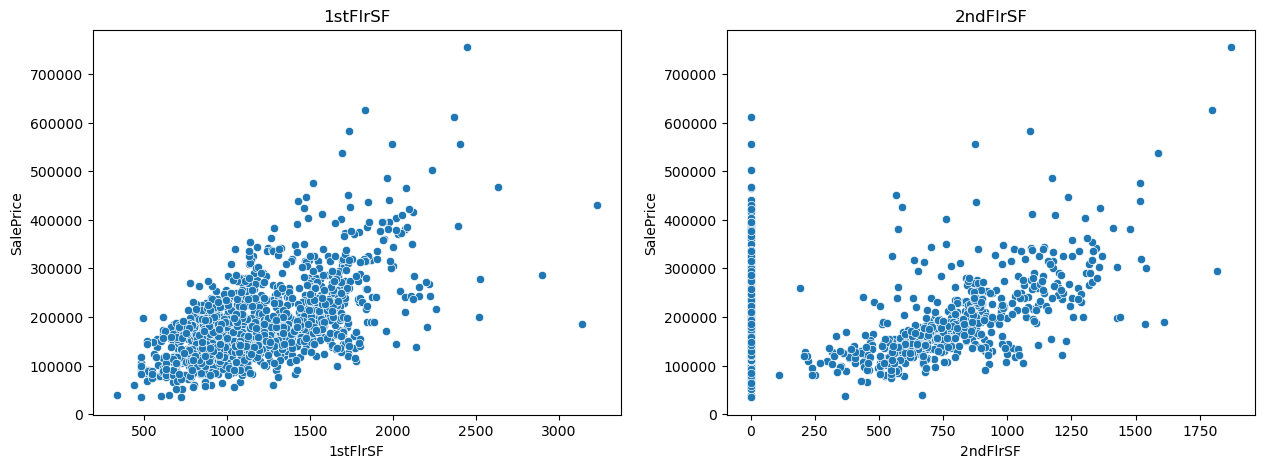

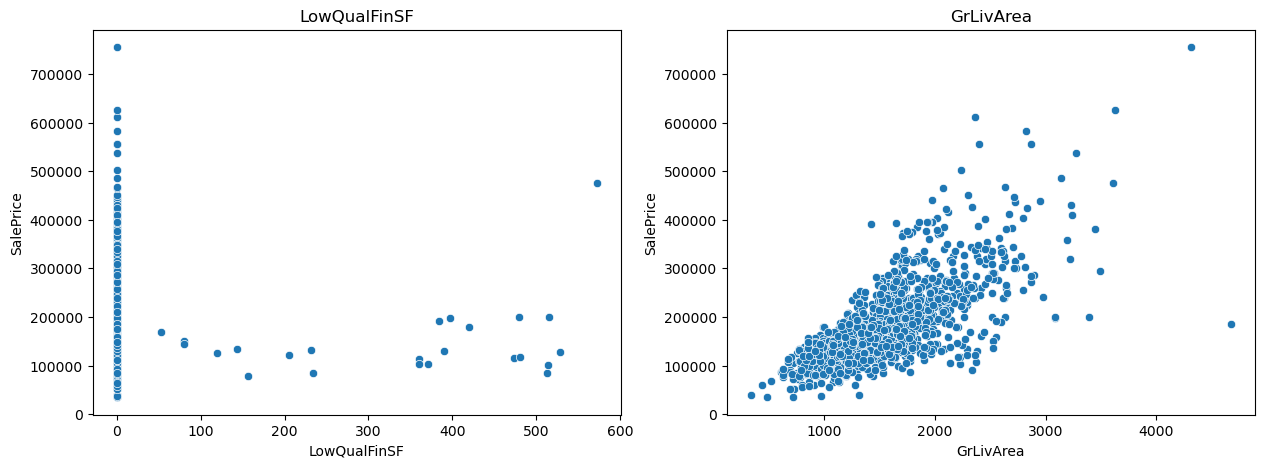

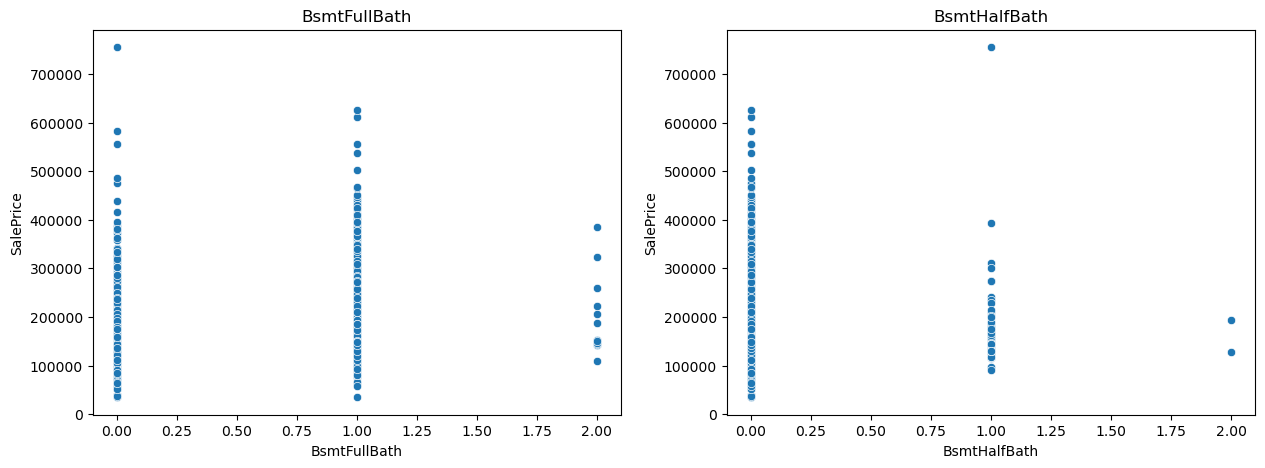

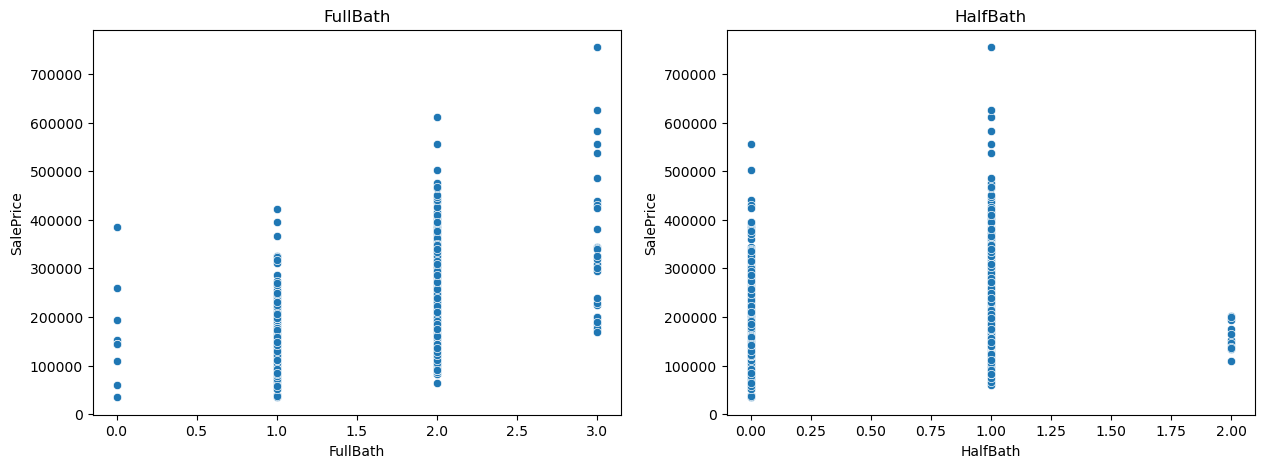

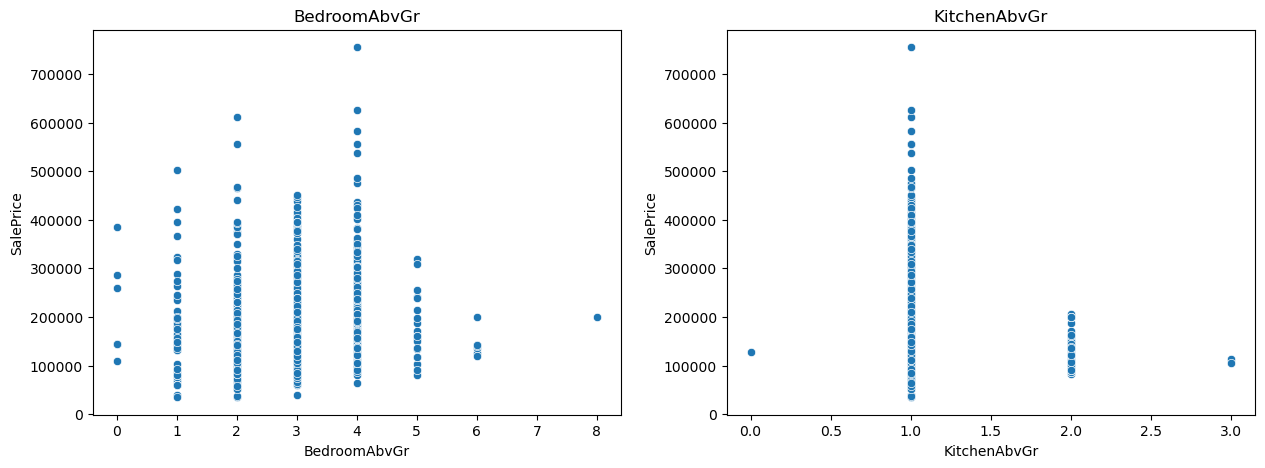

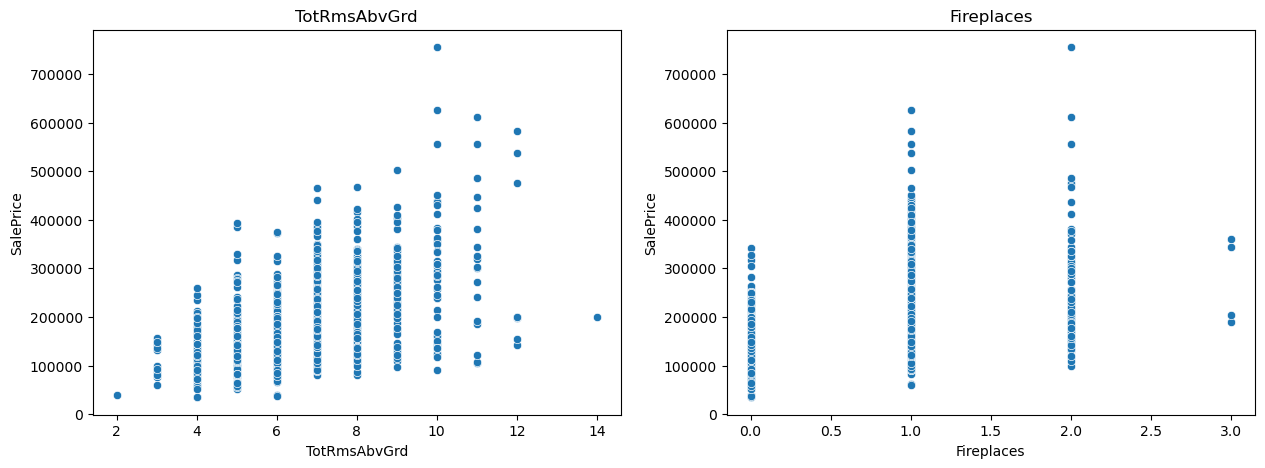

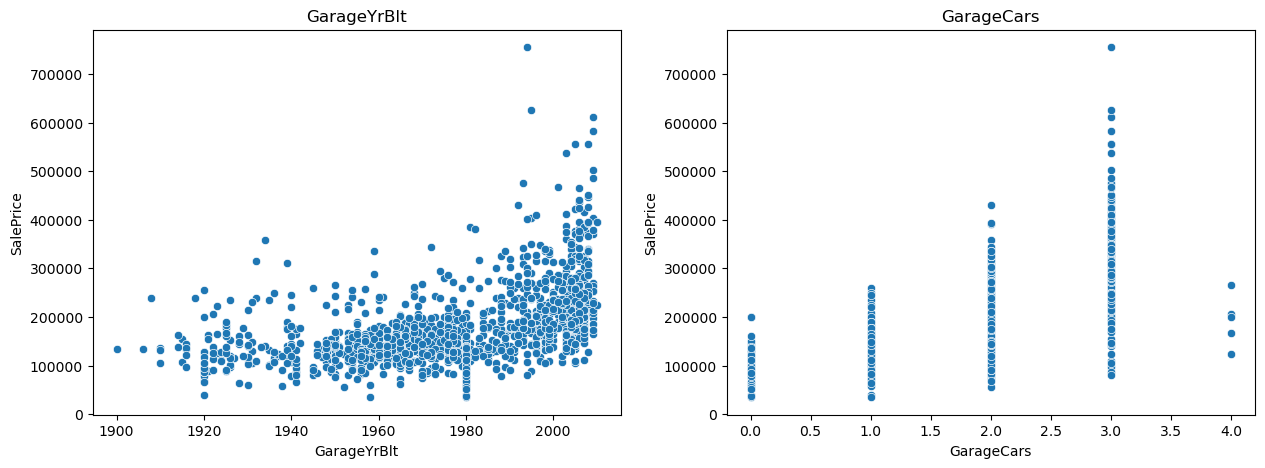

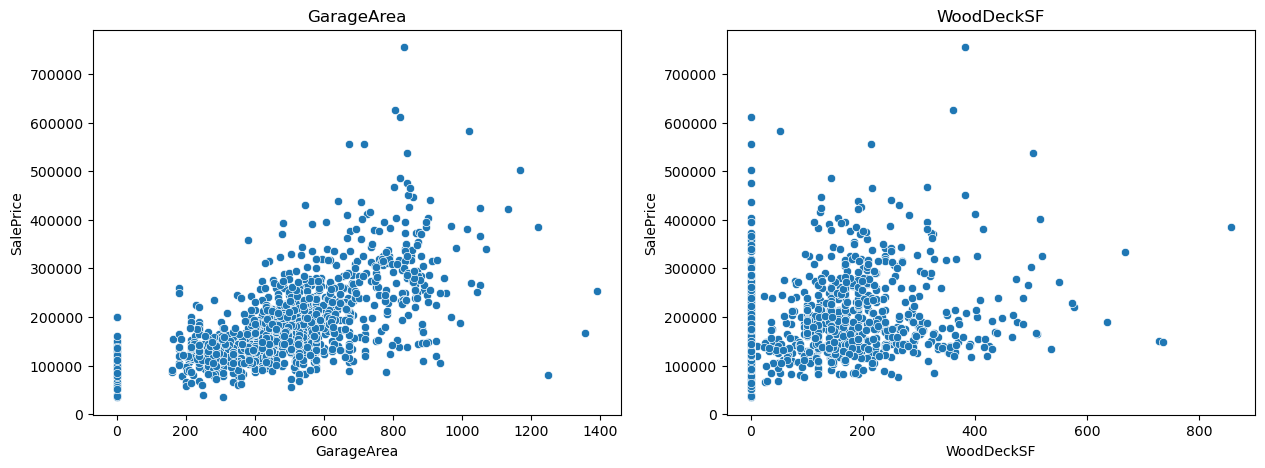

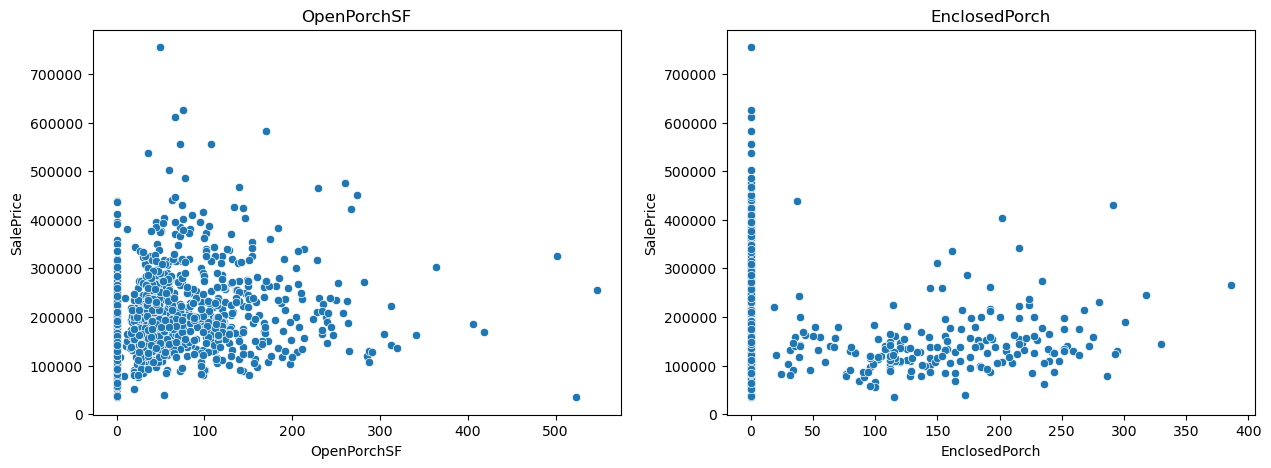

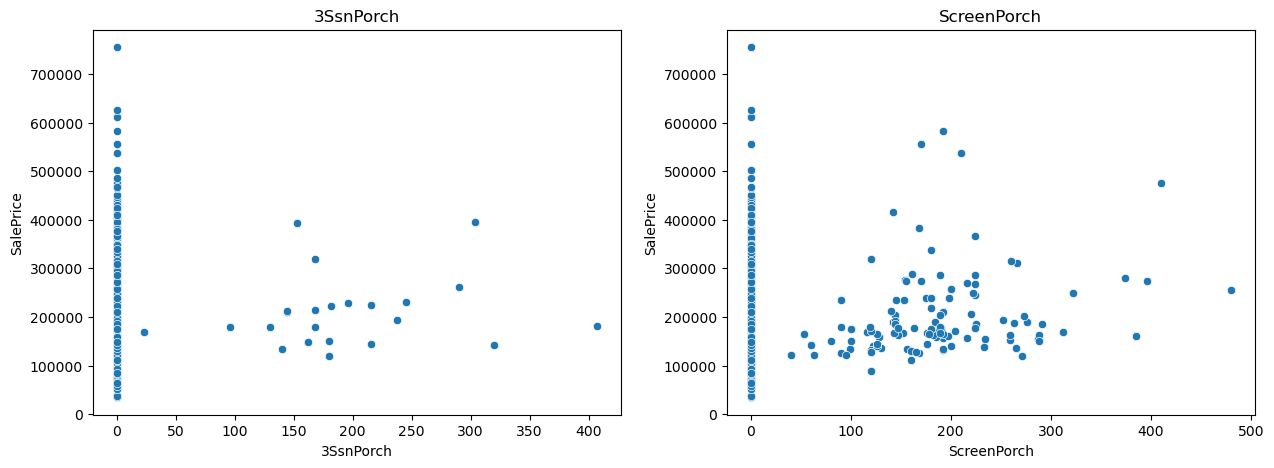

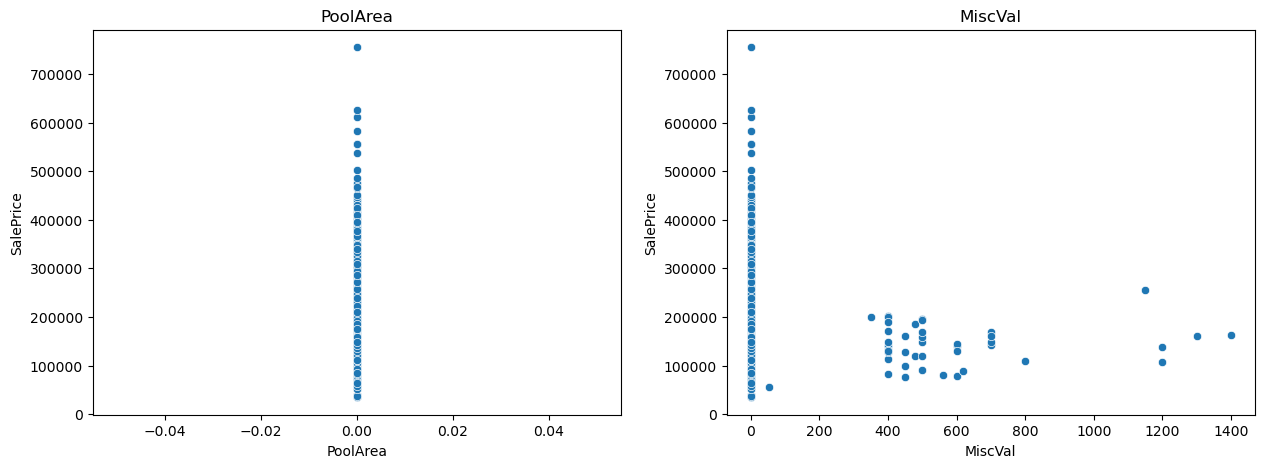

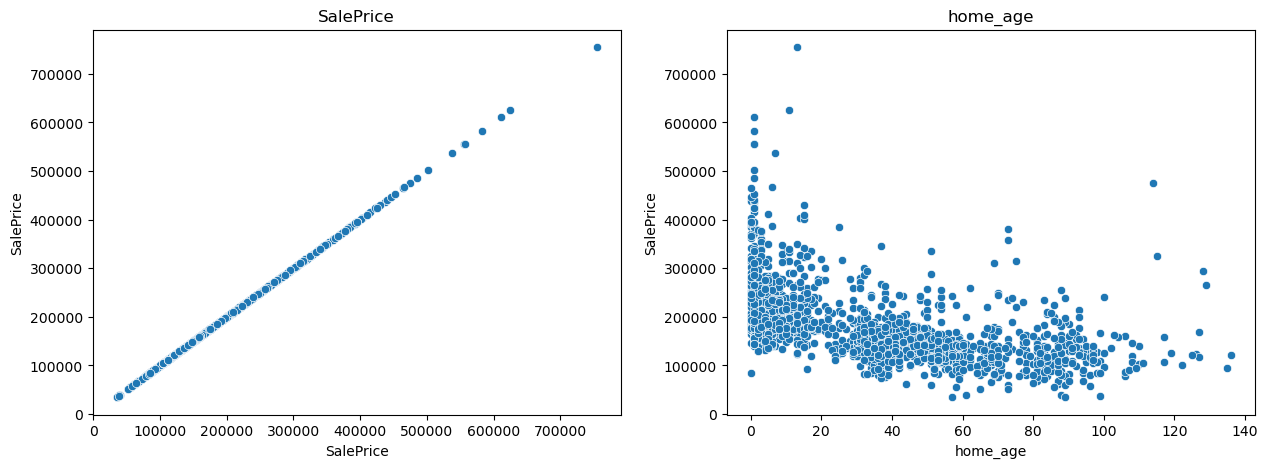

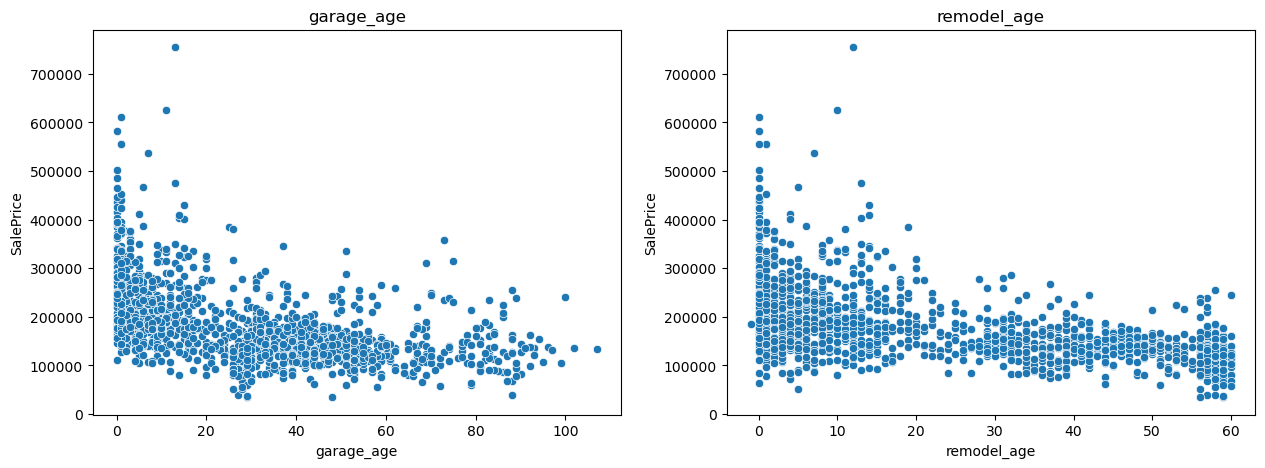

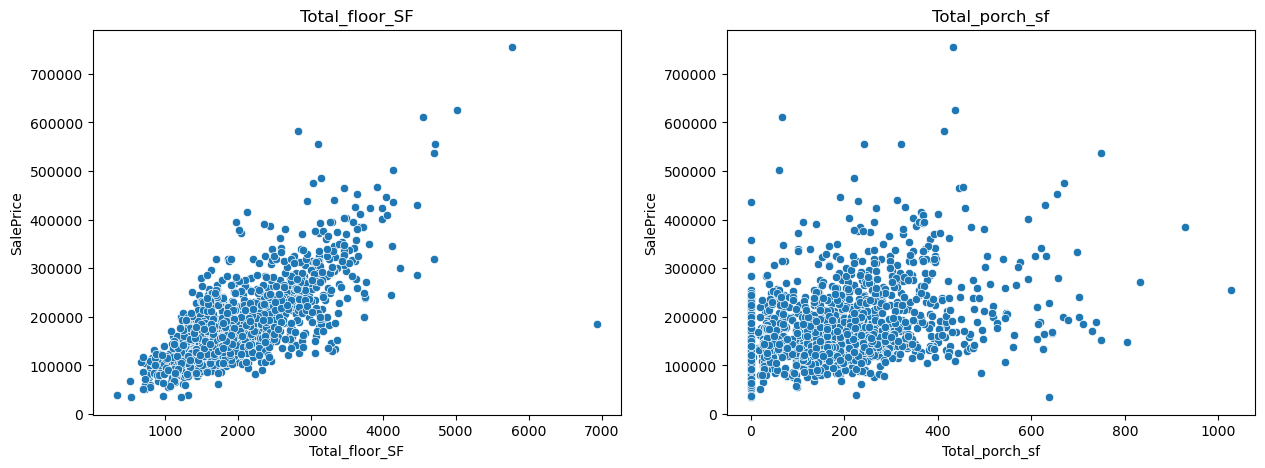

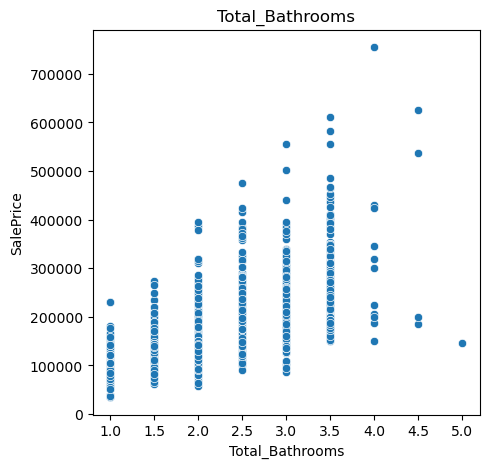

In [39]:
# Draw scatter plot for all the numeric columns vs Sale Price in the dataframe

len_num_cols = len(num_cols)
for i in range(0, len_num_cols-1, 2):
    # Set the figure size to a standard so that it will be easy for viewing
    plt.figure(figsize=(15,5))
    # Set the subplot index
    plt.subplot(1,2,1)
    # Calling scatter plot
    sns.scatterplot(home_data, x=num_cols[i], y="SalePrice")
    # Set the title of subplot
    plt.title(num_cols[i])
    # Set the subplot index
    plt.subplot(1,2,2)
    # Calling scatter plot
    sns.scatterplot(home_data, x=num_cols[i+1], y="SalePrice")
    # Set the title of subplot
    plt.title(num_cols[i+1])
    plt.show()

# Plot the last column in the list since the above for loop will not handle it
# Set the figure size to a standard so that it will be easy for viewing
plt.figure(figsize=(5,5))
# Calling scatter plot
sns.scatterplot(home_data, x=num_cols[len_num_cols-1], y="SalePrice")
# Set the title of plot
plt.title(num_cols[len_num_cols-1])
plt.show()

> We can see from graph that **'PoolArea'** has completely data with 0.

In [40]:
home_data.PoolArea.value_counts()

0    1440
Name: PoolArea, dtype: int64

In [41]:
# Let us drop the empty column
home_data = home_data.drop(columns=['PoolArea'])

home_data.shape

(1440, 77)

In [42]:
# Update the column classification based on types
classify_cols(home_data)

Numeric columns:  ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms'] 

Categoric columns:  ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType'

<Axes: >

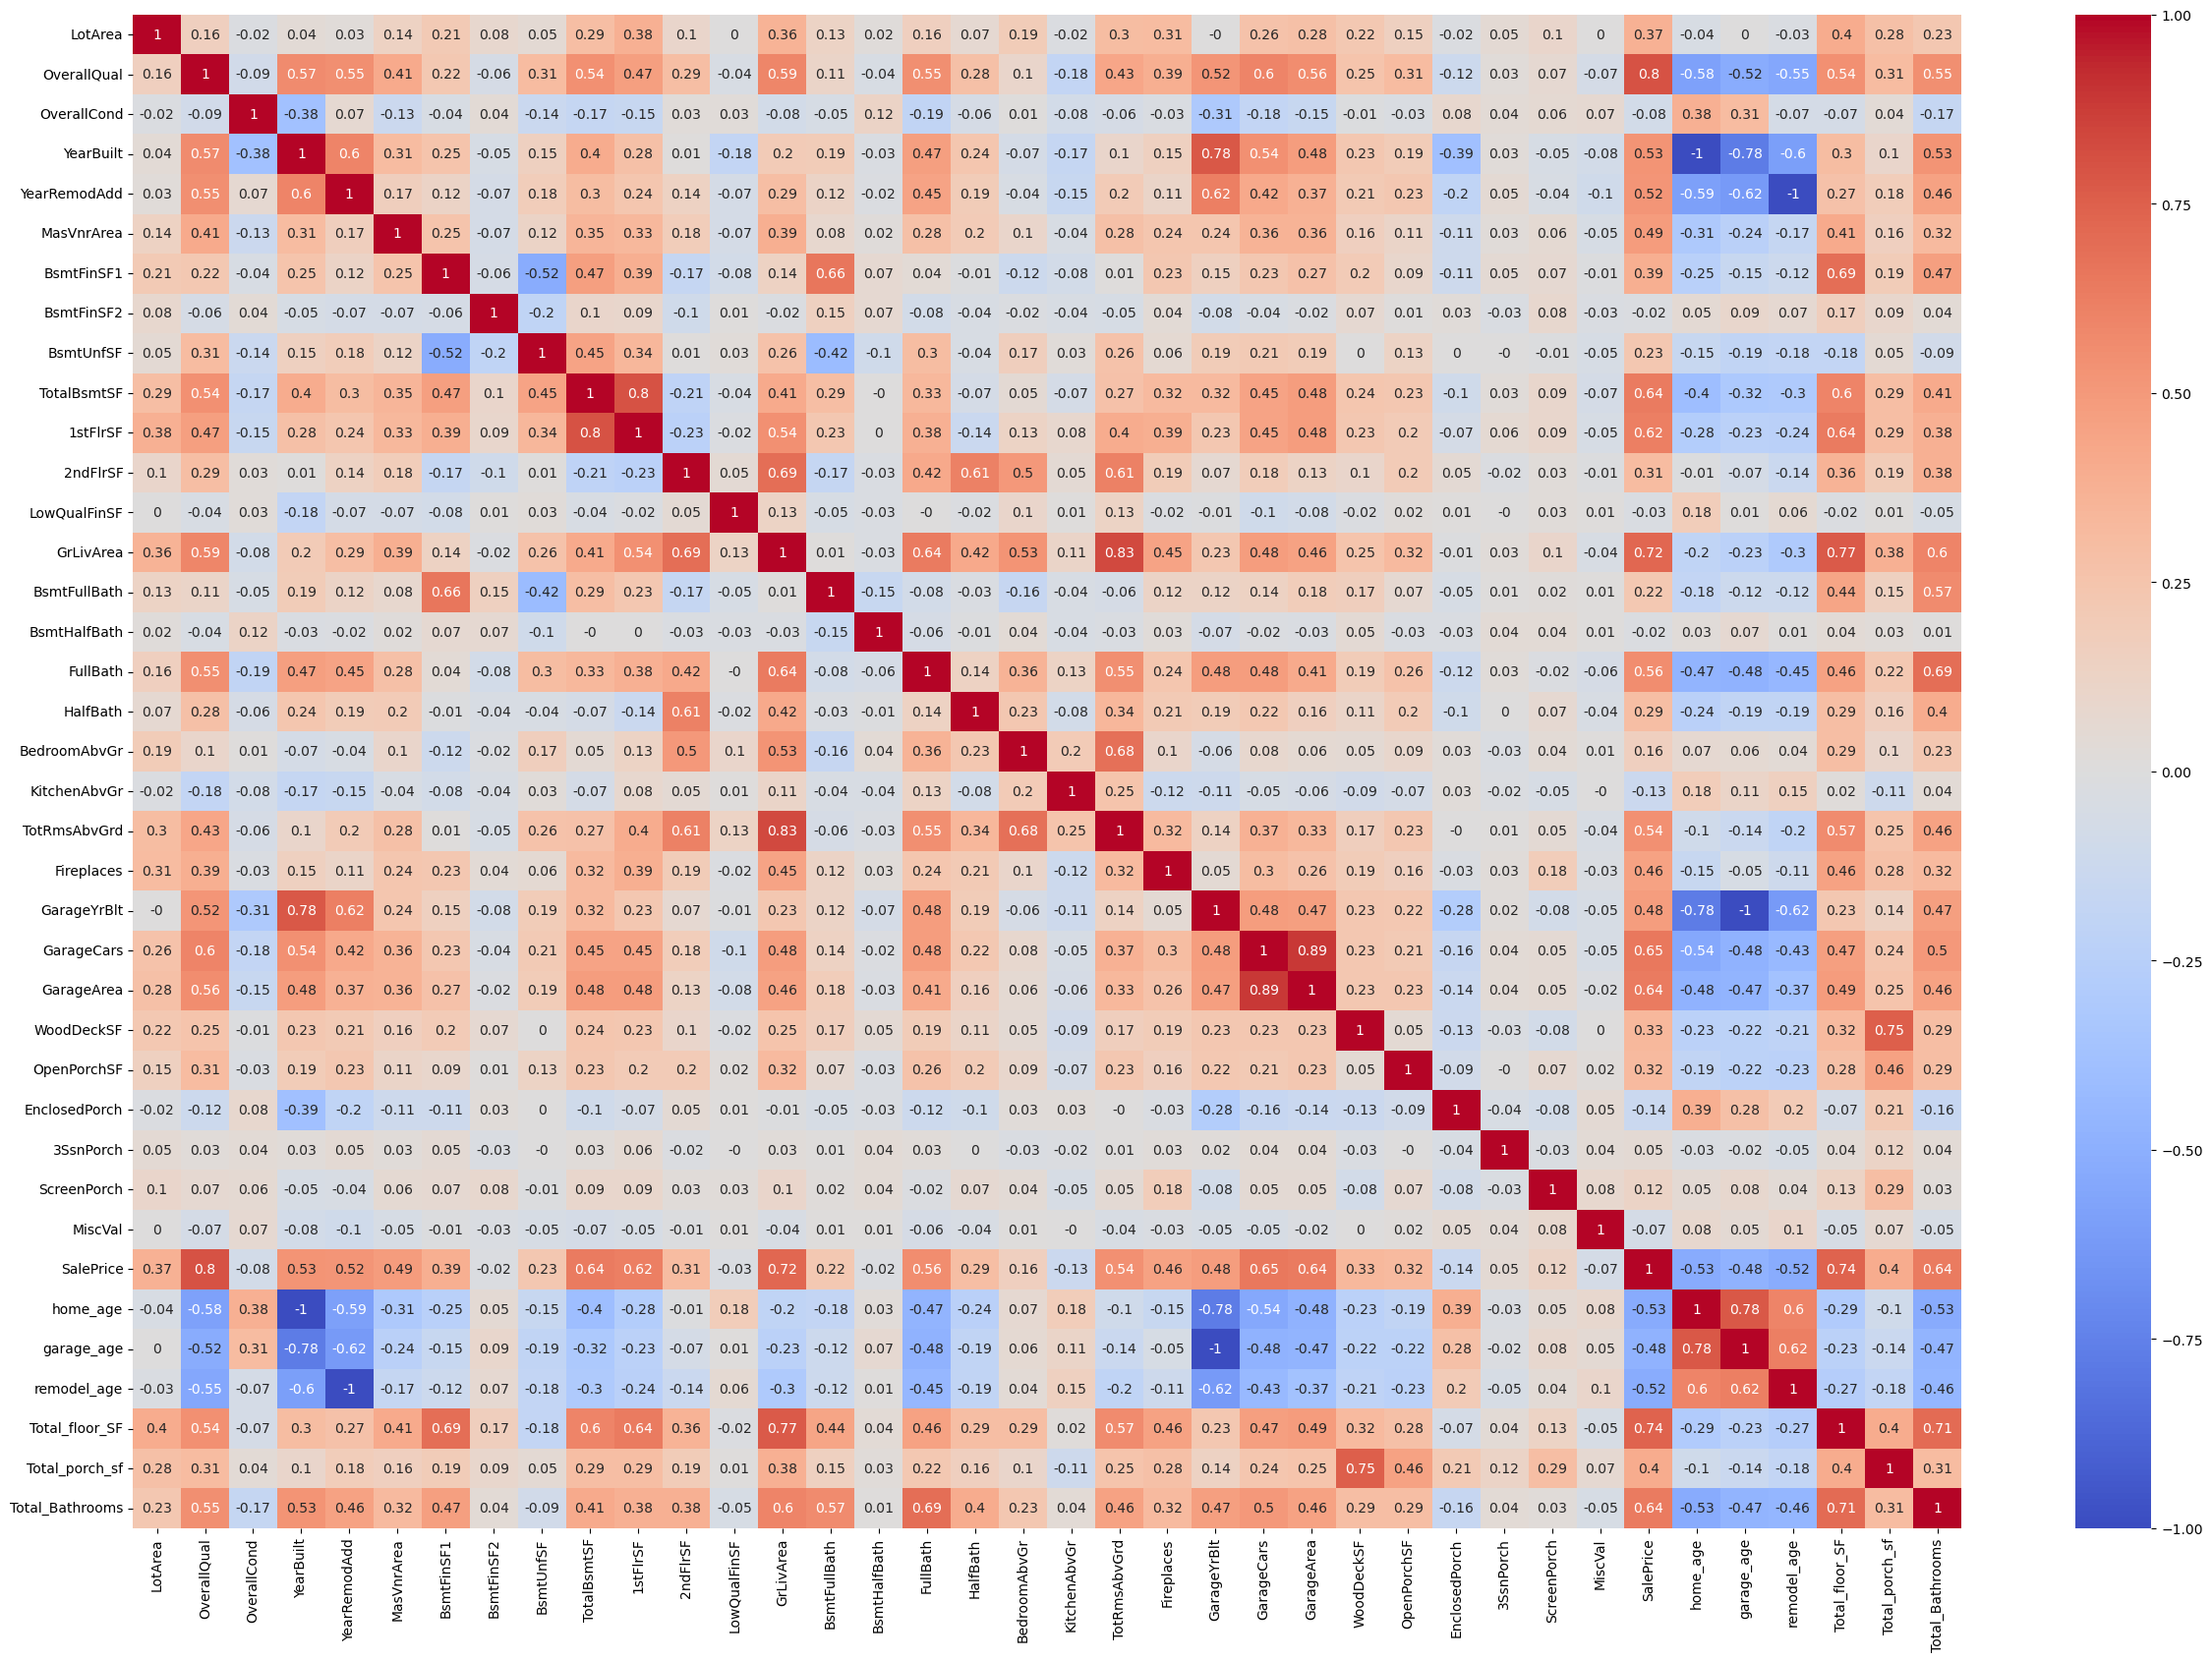

In [43]:
# Let's create heatmap to understand the correlation value between these variables
plt.figure(figsize=(30,20))
sns.heatmap(round(home_data.corr(),2), cmap='coolwarm' , annot=True, center = 0)

# Inference:

From the above plots and heat map, we can see the **'SalePrice'** has good linear relation with the following features:
- OverallQual
- GrLivArea
- Total_floor_SF
- LotArea
- TotalBsmtSF

---
---

<a id='prepare'></a>
## Step 4: Data Preparation

Let's create for all the categoric columns

In [44]:
print(cat_cols)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [45]:
# Create dummies for the categoric columns.
# Let's not drop the kth level since some columns do not have the full range of classes in the given data.
dummy_labels = pd.get_dummies(home_data[cat_cols])
# Sample the dataset
dummy_labels.head()

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_None  Alley_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0              0              0              0              0              0              1              0              0              0              0              0               0               0               0               0                 0            0            0            1            0           0           1           0             0             0             0             1                0                0                0                1                 0                  0              0              0                 1              1              0              0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
1              1              0              0              0              0              0              0              0              0              0              0               0               0               0               0                 0            0            0            1            0           0           1           0             0             0             0             1                0                0                0                1                 0                  0              1              0                 0              1              0              0                     0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
2              0              0              0              0              0              1              0              0              0              0              0               0               0               0               0                 0            0            0            1            0           0           1           0             1             0             0             0                0                0                0                1                 0                  0              0              0                 1              1              0              0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
3              0              0              0              0  

In [46]:
# Drop the original categorical columns
home_data = home_data.drop(columns=cat_cols, axis=1)
# Concat the dummy variables along with numerical columns
home_data = pd.concat([home_data, dummy_labels], axis=1)
# Print the shape of the dataset
home_data.shape

(1440, 302)

### Let us look into target variable

<Axes: xlabel='SalePrice', ylabel='Density'>

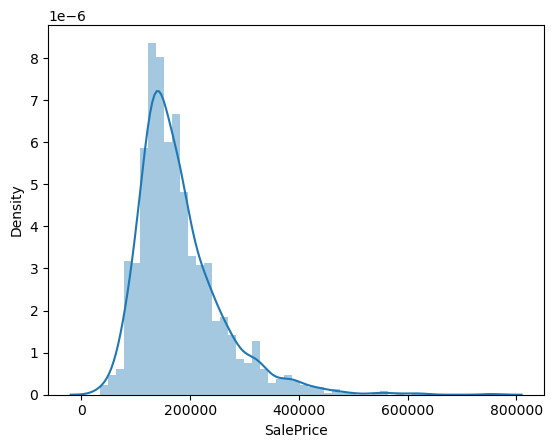

In [47]:
sns.distplot(home_data["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

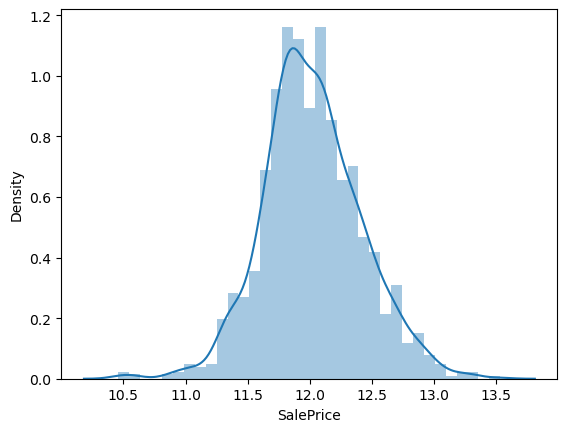

In [48]:
sns.distplot(np.log(home_data["SalePrice"]))

It appears that the target is very skewed and a transformation like a logarithm would make it more normally distributed. By transforming the prices, we can boost model performance.

In [49]:
home_data["LogPrice"] = np.log(home_data["SalePrice"])

In [50]:
# Update the column classification based on types
classify_cols(home_data)

Numeric columns:  ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'home_age', 'garage_age', 'remodel_age', 'Total_floor_SF', 'Total_porch_sf', 'Total_Bathrooms', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'Lot

- Now, the data is converted to a clean format suitable for model building.

---
---

<a id='split'></a>
## Step 5: Splitting the Data into Training and Testing Sets

We need to split the given dataset into train and test sets

In [51]:
# We specify random_state so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(home_data, train_size = 0.7, test_size = 0.3, random_state = 42)

In [52]:
print("Shape of train set : ", df_train.shape)
print("Shape of test set : ", df_test.shape)

Shape of train set :  (1007, 303)
Shape of test set :  (432, 303)


In [53]:
df_train.describe()

LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch      MiscVal      SalePrice     home_age   garage_age  remodel_age  Total_floor_SF  Total_porch_sf  Total_Bathrooms  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM   Alley_Grvl   Alley_None   Alley_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
count   1007.000000  1007.000000  1007.000000  1007.000000   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   1007.000000  1007.000000   1007.000000   1007.000000  1007.000000  1007.000000   1007.000000   1007.000000   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000    1007.000000  1007.000000  1007.000000  1007.000000    1007.000000  1007.000000  1007.000000  1007.000000     1007.000000     1007.000000      1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000    1007.000000     1007.000000     1007.000000     1007.000000     1007.000000       1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   1007.000000   1007.000000   1007.000000   1007.000000      1007.000000      1007.000000      1007.000000      1007.000000   
mean   10105.922542     6.117180     5.570010  1971.731877   1984.800397   104.505462   435.594836    51.193644   569.064548  1055.853029  1152.844091   357.441907      5.562066  1515.848064      0.414101      0.062562     1.571003     0.380338      2.881827      1.044687      6.531281     0.593843  1978.756703     1.774578   471.714995    92.128103    47.475670      20.809335     3.216485    15.568024    18.057597  181272.862959    36.059583    29.034757    22.991063     1997.074479      179.197617         2.206554       0.364449       0.043694       0.002979       0.008937       0.103277       0.219464       0.036743       0.010924       0.035750       0.013903       0.036743        0.057597        0.040715        0.006951        0.017875          0.005958     0.044687     0.010924     0.789474     0.148957     0.032771     0.942403     0.024826      0.325720      0.029791      0.005958      0.638530         0.040715         0.034757         0.022840         0.901688   
std     5800.862549     1.380845     1.107903    29.997840     20.628130   181.286626   432.465286   172.787995   438.420537   407.055462   363.791988   441.089894     47.866135   513.162471      0.504768      0.246362     0.543051     0.497839      0.828744      0.216122      1.624479     0.629685    24.017584     0.751294   211.213787   125.650761    68.659409      57.531903    27.241443    55.206598   113.227795   78653.805020    30.066269    24.051671    20.599295      730.290119      155.566929         0.765844       0.481514       0.204515       0.054527       0.094161       0.304472       0.414089       0.188223       0.103995       0.185758       0.117145       0.188223        0.233095        0.197727        0.083126        0.132562          0.076998     0.206719     0.103995     0.407885     0.356223     0.178124     0.233095     0.155673      0.468876      0.170096      0.076998      0.480665         0.197727         0.183254         0.149468         0.297884   
min     1300.000000     1.000000     1.000000  1872.000000   195

---
<a id='datasplit_scaler'></a>
### 5.1 Min Max Scaler

In [54]:
# Create a Min Max scaler object
scaler = MinMaxScaler()
# Since we need to learn and apply the learning on train data, we use fit_transform()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Sample the training data
df_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice  home_age  garage_age  remodel_age  Total_floor_SF  Total_porch_sf  Total_Bathrooms  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_None  Alley_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
96    0.129051     0.666667         0.50   0.920290      0.816667    0.114375    0.514159    0.000000   0.182363     0.495321  0.447218  0.000000           0.0   0.288807           0.0           0.0  0.666667       0.0         0.375      0.333333      0.333333    0.000000     0.900000         0.5    0.348083    0.184364     0.053016            0.0        0.0          0.0      0.0   0.248715  0.051471    0.065421     0.131148        0.365950        0.182084         0.285714            1.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           1.0           0.0           0.0           0.0              0.0              0.0              0.0              1.0               0.0                0.0            0.0   
1180  0.142094     0.666667         0.50   0.855072      0.683333    0.000000    0.538053    0.000000   0.000000     0.379289  0.343795  0.649573           0.0   0.502073           0.0           0.0  0.666667       0.5         0.500      0.333333      0.500000    0.000000     0.818182         0.5    0.511062    0.000000     0.000000            0.0        0.0          0.0      0.0   0.298709  0.117647    0.149533     0.262295        0.514390        0.000000         0.428571            0.0            0.0            0.0            0.0            0.0            1.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           0.0           1.0           0.0           0.0              0.0              0.0              0.0              1.0               1.0                0.0            0.0   
445   0.123163     0.555556         0.50   0.608696      0.100000    0.000000    0.000000    0.000000   0.614726     0.447910  0.483238  0.000000           0.0   0.312068           0.0           0.0  0.333333       0.0         0.375      0.333333      0.416667    0.333333     0.509091         0.5    0.353982    0.000000     0.000000            0.0        0.0          0.0      0.0   0.128593  0.389706    0.495327     0.885246        0.205241        0.000000         0.000000            1.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           0.0           0.0           0.0           1.0              0.0              0.0              0.0              1.0               1.0                0.0            0.0   
1377  0.139618     0.444444         0.5

In [55]:
# Since we need to apply the learning on test data, we use transform()
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Sample the test data
df_test.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice  home_age  garage_age  remodel_age  Total_floor_SF  Total_porch_sf  Total_Bathrooms  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_None  Alley_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
168  0.099970     0.666667         0.50   0.956522      0.900000       0.000    0.000000         0.0   0.359589     0.262009  0.180456  0.470085           0.0   0.319208           0.0           0.0  0.666667       0.5         0.375      0.333333      0.416667    0.333333     0.945455        0.50    0.324484    0.116686     0.087751            0.0        0.0     0.000000      0.0   0.206360  0.022059    0.028037     0.065574        0.209936        0.144109         0.428571            0.0            0.0            0.0            0.0            0.0            1.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           1.0           0.0           0.0           0.0              0.0              0.0              0.0              1.0               0.0                0.0            0.0   
613  0.102244     0.444444         0.50   0.978261      0.950000       0.000    0.091150         0.0   0.391267     0.349345  0.280314  0.000000           0.0   0.181023           0.0           0.0  0.333333       0.0         0.375      0.333333      0.333333    0.000000     0.727273        0.00    0.000000    0.000000     0.054845            0.0        0.0     0.000000      0.0   0.155673  0.000000    0.252336     0.016393        0.150257        0.029211         0.000000            1.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           0.0           0.0           0.0           1.0              0.0              0.0              0.0              1.0               0.0                0.0            0.0   
556  0.195073     0.444444         0.50   0.615942      0.116667       0.000    0.396018         0.0   0.084332     0.340611  0.270328  0.000000           0.0   0.174574           0.5           0.0  0.333333       0.0         0.250      0.333333      0.333333    0.333333     0.518182        0.25    0.220501    0.312719     0.000000            0.0        0.0     0.254167      0.0   0.147341  0.360294    0.457944     0.819672        0.250379        0.379747         0.285714            1.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0             0.0             0.0             0.0               0.0          0.0          0.0          1.0          0.0         0.0         1.0         0.0           1.0           0.0           0.0           0.0              0.0              0.0              0.0              1.0               0.0                0.0            0.0   
65   0.119362     0.777778         0.50   

---
---

<a id='build'></a>
## Step 6: Building model

Before creating model, let us eliminate features which have high multicollinearity.

In [56]:
X_train = df_train.drop(["SalePrice", "LogPrice"], axis=1)
y_train = df_train["LogPrice"]

In [57]:
X_test = df_test.drop(["SalePrice", "LogPrice"], axis=1)
y_test = df_test["LogPrice"]

#### Setup model parameters :

In [58]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Set the folds
folds = 10

---
<a id='datamodel_ridge'></a>
### 6.1 Ridge

In [59]:
# Create a Ridge model instance
ridge = Ridge(random_state=100)

# cross validation
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


In [61]:
# Retrieve the results from the model
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  mean_train_score  std_train_score
0       0.019720      0.013891         0.006597        0.006040      0.0001  {'alpha': 0.0001}           0.862936           0.864091           0.885790           0.917510           0.738847           0.889147           0.928036           0.900593           0.903562           0.911926         0.880244        0.051282               24            0.947092            0.949691            0.946545            0.944963            0.957991            0.946760            0.943455            0.945833            0.945529            0.946688          0.947455         0.003829
1       0.015817      0.003253         0.004429        0.005687       0.001   {'alpha': 0.001}           0.863058           0.864131           0.885811           0.917534           0.738911           0.889233           0.928059           0.900646           0.903601           0.911935         0.880292        0.051268               23            0.947092            0.949691            0.946545            0.944963            0.957991            0.946760            0.943455            0.945833            0.945529            0.946688          0.947455         0.003829
2       0.013102      0.003844         0.006653        0.005410        0.01    {'alpha': 0.01}           0.864230           0.864524           0.886014           0.917764           0.739534           0.890060           0.928273           0.901156           0.903969           0.912016         0.880754        0.051141               22            0.947090            0.949689            0.946544            0.944961            0.957989            0.946758            0.943453            0.945831            0.945527            0.946687          0.947453         0.003829
3       0.018955      0.002608         0.004041        0.004427        0.05    {'alpha': 0.05}           0.868579           0.866050           0.886767           0.918685           0.741958           0.893094           0.928964           0.903134           0.905344           0.912311         0.882489        0.050647               21            0.947043            0.949651            0.946518            0.944936            0.957954            0.946719            0.943412            0.945799            0.945493            0.946655          0.947418         0.003828
4       0.016225      0.004296         0.008027        0.005545         0.1     {'alpha': 0.1}           0.872650           0.867583           0.887484           0.919665           0.744424           0.895837           0.929470           0.905116           0.906663           0.912577         0.884147        0.050147               20            0.946937            0.949563            0.946457            0.944871            0.957868            0.946624            0.943320            0.945721            0.945412            0.946580          0.947335         0.003826

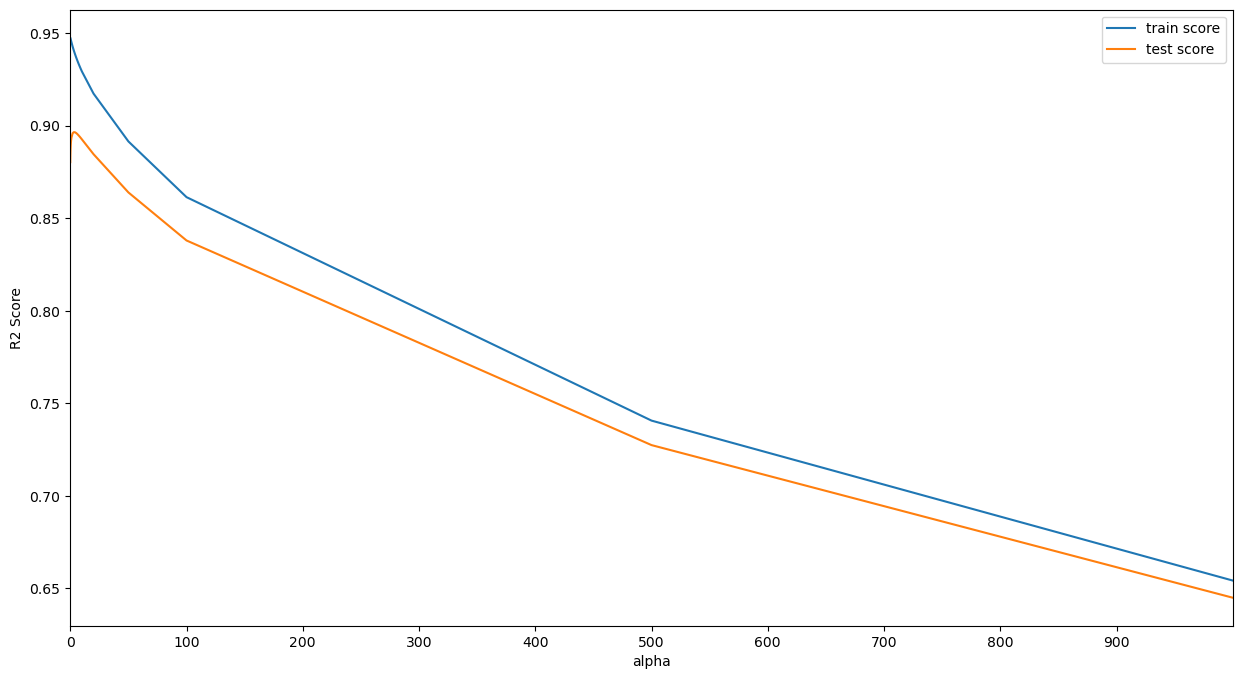

In [62]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, 100))
plt.show()

Looking at the graph we can see around 3 we have better performance. Let's rebuild the model using a different hyper parameter around that space.

In [63]:
params_1 = {'alpha': np.linspace(3,4,10)}

In [64]:
# Create a Ridge model instance
ridge = Ridge(random_state=100)

# cross validation
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params_1,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=100),
             param_grid={'alpha': array([3.        , 3.11111111, 3.22222222, 3.33333333, 3.44444444,
       3.55555556, 3.66666667, 3.77777778, 3.88888889, 4.        ])},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.3333333333333335}


In [66]:
# Retrieve the results from the model
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha                         params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  mean_train_score  std_train_score
0       0.018621      0.005276         0.008048        0.005668         3.0                 {'alpha': 3.0}           0.905237           0.881233           0.892932           0.931219           0.773568           0.908733           0.924546           0.916922           0.917881           0.912141         0.896441        0.043238                7            0.939792            0.942634            0.940592            0.938361            0.950850            0.939859            0.936890            0.938735            0.938588            0.940086          0.940639         0.003701
1       0.016267      0.008989         0.007812        0.007812    3.111111   {'alpha': 3.111111111111111}           0.905468           0.881258           0.892896           0.931301           0.773872           0.908759           0.924267           0.916835           0.917900           0.912041         0.896460        0.043138                5            0.939561            0.942409            0.940384            0.938141            0.950625            0.939641            0.936680            0.938509            0.938362            0.939865          0.940418         0.003699
2       0.015223      0.006090         0.008263        0.007045    3.222222  {'alpha': 3.2222222222222223}           0.905681           0.881276           0.892855           0.931376           0.774160           0.908781           0.923990           0.916743           0.917911           0.911940         0.896471        0.043042                3            0.939332            0.942186            0.940178            0.937924            0.950403            0.939425            0.936472            0.938285            0.938137            0.939646          0.940199         0.003697
3       0.015134      0.004443         0.006394        0.004396    3.333333  {'alpha': 3.3333333333333335}           0.905877           0.881285           0.892810           0.931446           0.774434           0.908798           0.923715           0.916645           0.917914           0.911838         0.896476        0.042949                1            0.939104            0.941965            0.939973            0.937707            0.950183            0.939210            0.936266            0.938063            0.937915            0.939428          0.939981         0.003696
4       0.015652      0.005456         0.005638        0.003575    3.444444  {'alpha': 3.4444444444444446}           0.906057           0.881287           0.892761           0.931509           0.774693           0.908813           0.923443           0.916543           0.917910           0.911735         0.896475        0.042859                2            0.938879            0.941746            0.939770            0.937493            0.949965            0.938997            0.936061            0.937843            0.937695            0.939212          0.939766         0.003695

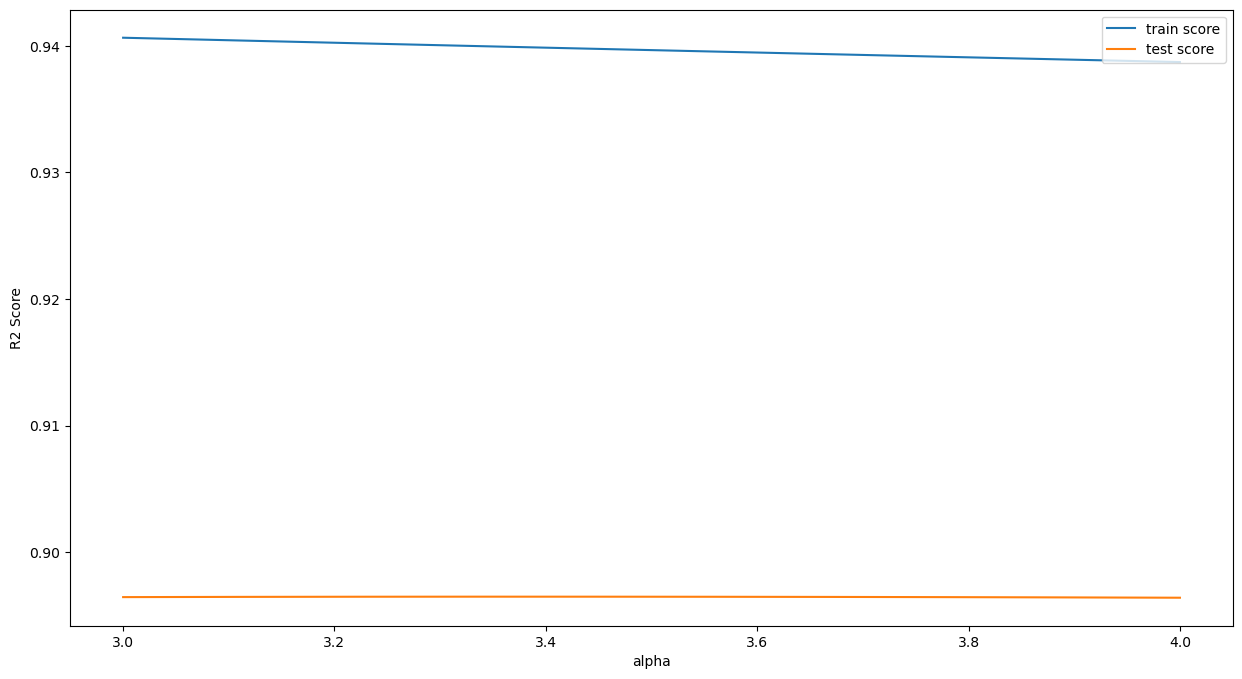

In [67]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised
best_alpha_ridge = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=best_alpha_ridge, random_state=100)

ridge.fit(X_train, y_train)

print("Ridge Intercept : ", ridge.intercept_)
print("Ridge Coefficient :\n", ridge.coef_)

Ridge Intercept :  0.17135005252397584
Ridge Coefficient :
 [ 3.78558497e-02  9.22926617e-02  5.29500961e-02  1.69235926e-02
  1.31633575e-02  3.30043691e-03  2.47523291e-02  1.30869330e-02
  2.26014779e-02  3.99337041e-02  6.62314583e-02  4.32994978e-02
  1.53717451e-02  6.34643729e-02  8.18386086e-03 -2.85350534e-03
  1.85873109e-02  2.61252150e-02  3.18549350e-02 -1.22855841e-02
  4.51263016e-02  2.84507010e-02 -5.39867201e-03  3.54612891e-02
  5.07004811e-02  1.31916576e-02 -2.75016946e-03  2.81942551e-03
  9.59750895e-03  2.33505867e-02 -7.57651491e-03 -1.73094155e-02
  5.37597377e-03 -1.32528881e-02  5.18024950e-02  2.50674651e-02
  2.72575326e-02  4.70330207e-03 -1.74047151e-02 -1.32483778e-04
  6.69440848e-03  1.57845386e-03  1.09575380e-03  2.28126232e-02
  6.00894972e-03  6.44481935e-04 -1.35095400e-03 -1.59247050e-03
 -3.33490292e-03 -1.72416084e-02 -7.36775130e-03  4.88691298e-03
 -7.34905250e-02  2.20255880e-02  2.58922527e-02  1.84248847e-02
  7.14779963e-03  3.59131507e-

In [69]:
# Lets calculate metrics : R2 score and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
ridge_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
ridge_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
ridge_metric.append(rmse_test_lr)

R2 Score (Train) :  0.9385500826842618
R2 Score (Test)  :  0.8979464426787831
RMSE (Train)     :  0.032110514277907384
RMSE (Test)      :  0.04091772217212406


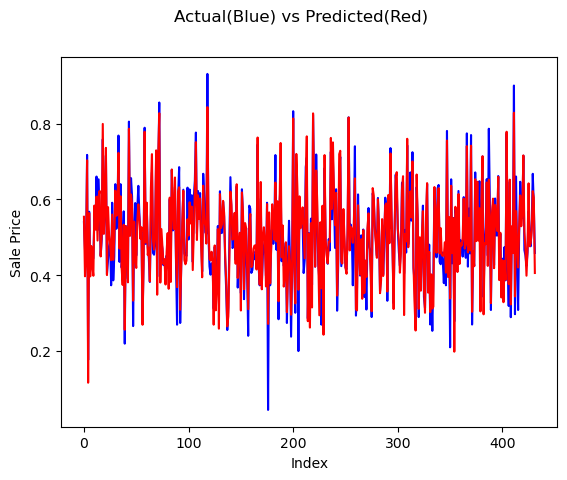

In [70]:
# Look how closely the actual and predicted values are in test data
index = [i for i in range(0,len(X_test),1)]
plt.plot(index,y_test, color="blue")
plt.plot(index,y_pred_test, color="red")
plt.suptitle('Actual(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.show()

In [71]:
#Displaing the co-efficients of the model in order
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge.coef_),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: "Ridge Co-Efficient"},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(20)

Ridge Co-Efficient
OverallQual                     0.092293
1stFlrSF                        0.066231
GrLivArea                       0.063464
OverallCond                     0.052950
Total_floor_SF                  0.051802
GarageArea                      0.050700
TotRmsAbvGrd                    0.045126
2ndFlrSF                        0.043299
Neighborhood_Crawfor            0.041656
TotalBsmtSF                     0.039934
LotArea                         0.037856
Neighborhood_StoneBr            0.037394
GarageCars                      0.035461
BedroomAbvGr                    0.031855
Neighborhood_NridgHt            0.029351
SaleType_ConLD                  0.028748
Fireplaces                      0.028451
Exterior1st_BrkFace             0.028180
Total_Bathrooms                 0.027258
HalfBath                        0.026125

---
<a id='datamodel_lasso'></a>
### 6.2 Lasso

In [72]:
# Create a Lasso model instance
lasso = Lasso(random_state=100)

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [73]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [74]:
# We select only the top 5 since the model mean scores become 0 after that alpha values
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_).head()
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  mean_train_score  std_train_score
0       0.093792      0.038544         0.007096        0.004955      0.0001  {'alpha': 0.0001}           0.902014           0.881698           0.901906           0.936348           0.764452           0.909617           0.933775           0.926532           0.934356           0.917867         0.900857        0.048442                1            0.937513            0.939944            0.937561            0.935985            0.949054            0.937461            0.934426            0.935907            0.935615            0.937047          0.938051         0.003930
1       0.022346      0.003514         0.004522        0.004613       0.001   {'alpha': 0.001}           0.900278           0.853340           0.869000           0.919975           0.776086           0.887051           0.875952           0.888802           0.901251           0.895594         0.876733        0.037909                2            0.887588            0.892708            0.891245            0.889540            0.905534            0.890843            0.890120            0.889961            0.887428            0.888249          0.891321         0.004992
2       0.015936      0.004069         0.006448        0.004102        0.01    {'alpha': 0.01}           0.498251           0.528974           0.518228           0.639454           0.549925           0.622632           0.500894           0.551111           0.582059           0.531814         0.552334        0.045960                3            0.558459            0.556888            0.565386            0.555990            0.560606            0.560049            0.556919            0.560382            0.560651            0.550755          0.558608         0.003656
3       0.017348      0.006980         0.005035        0.004695        0.05    {'alpha': 0.05}          -0.001993          -0.000880          -0.004157          -0.000900          -0.003681          -0.000870          -0.000050          -0.000011          -0.000716          -0.007490        -0.002075        0.002252                4            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000          0.000000         0.000000
4       0.014335      0.004457         0.006043        0.004591         0.1     {'alpha': 0.1}          -0.001993          -0.000880          -0.004157          -0.000900          -0.003681          -0.000870          -0.000050          -0.000011          -0.000716          -0.007490        -0.002075        0.002252                4            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000            0.000000          0.000000         0.000000

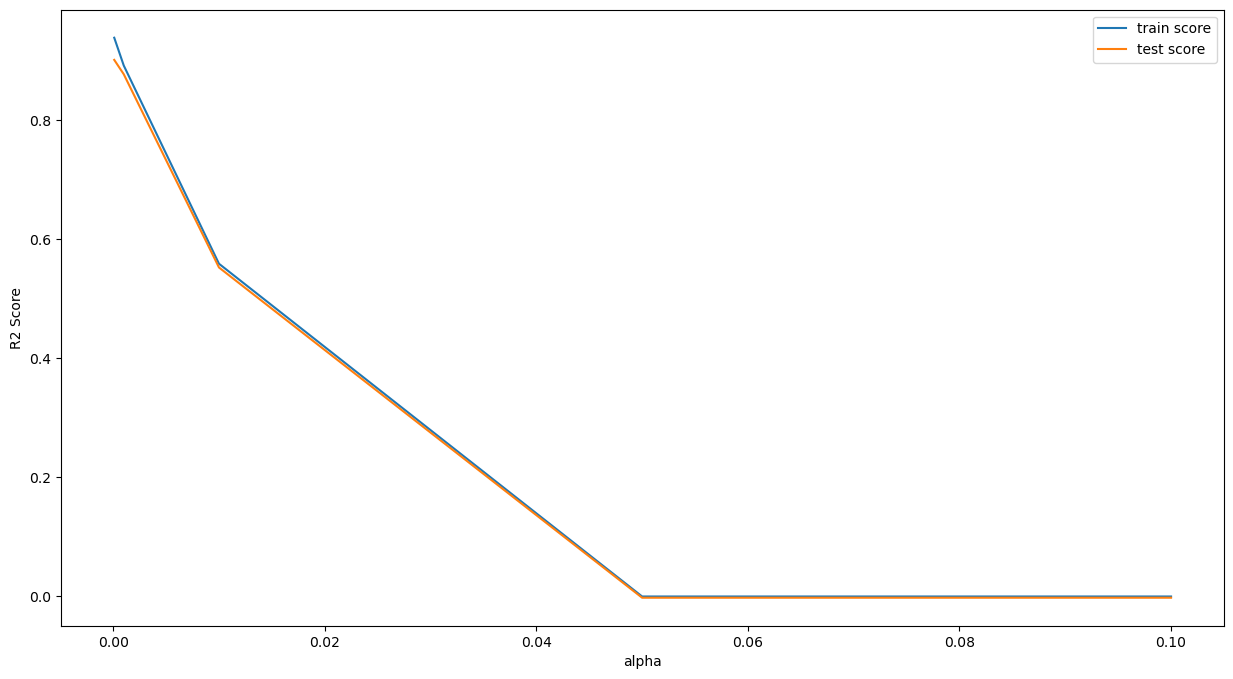

In [75]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Looking at the graph we can see around 0.0001 we have better performance. Let's rebuild the model using a different hyper parameter around that space.

In [76]:
params_1 = {'alpha': np.linspace(0.00001,0.0002,10)}

In [77]:
# Create a Lasso model instance
lasso = Lasso(random_state=100)

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params_1, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100),
             param_grid={'alpha': array([1.00000000e-05, 3.11111111e-05, 5.22222222e-05, 7.33333333e-05,
       9.44444444e-05, 1.15555556e-04, 1.36666667e-04, 1.57777778e-04,
       1.78888889e-04, 2.00000000e-04])},
             return_train_score=True, scoring='r2', verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.00015777777777777776}


In [79]:
# We select only the top 5 since the model mean scores become 0 after that alpha values
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_).head()
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha                            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  split5_test_score  split6_test_score  split7_test_score  split8_test_score  split9_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  split5_train_score  split6_train_score  split7_train_score  split8_train_score  split9_train_score  mean_train_score  std_train_score
0       0.260380      0.015500         0.005736        0.004174     0.00001                  {'alpha': 1e-05}           0.879747           0.870283           0.891354           0.925207           0.748207           0.897526           0.931764           0.906370           0.911191           0.914370         0.887602        0.049895               10            0.946496            0.949204            0.946085            0.944497            0.957546            0.946305            0.942765            0.945357            0.945075            0.946215          0.946955         0.003858
1       0.255242      0.026978         0.004230        0.004449    0.000031  {'alpha': 3.111111111111111e-05}           0.892203           0.877324           0.898994           0.931616           0.757862           0.907583           0.933658           0.917036           0.921201           0.916965         0.895444        0.048774                9            0.944113            0.947314            0.944269            0.942547            0.955545            0.944126            0.940755            0.943445            0.943150            0.944233          0.944950         0.003861
2       0.213256      0.065521         0.009064        0.002425    0.000052  {'alpha': 5.222222222222222e-05}           0.894988           0.880147           0.902391           0.932931           0.762434           0.909073           0.934833           0.923236           0.927669           0.918083         0.898579        0.048313                8            0.941986            0.945269            0.942123            0.940410            0.953484            0.941873            0.938922            0.941163            0.940944            0.942155          0.942833         0.003866
3       0.179604      0.066194         0.009047        0.003146    0.000073  {'alpha': 7.333333333333333e-05}           0.898945           0.881667           0.902426           0.934047           0.763345           0.908804           0.934856           0.925655           0.931705           0.918088         0.899954        0.048435                7            0.939936            0.942964            0.940003            0.938386            0.951276            0.939818            0.937015            0.938590            0.938452            0.939857          0.940630         0.003846
4       0.114523      0.032146         0.009649        0.000806    0.000094  {'alpha': 9.444444444444444e-05}           0.901383           0.881948           0.902173           0.935941           0.764337           0.909379           0.933957           0.926351           0.934026           0.917953         0.900745        0.048413                6            0.937984            0.940558            0.938099            0.936526            0.949515            0.937974            0.934972            0.936402            0.936209            0.937647          0.938589         0.003911

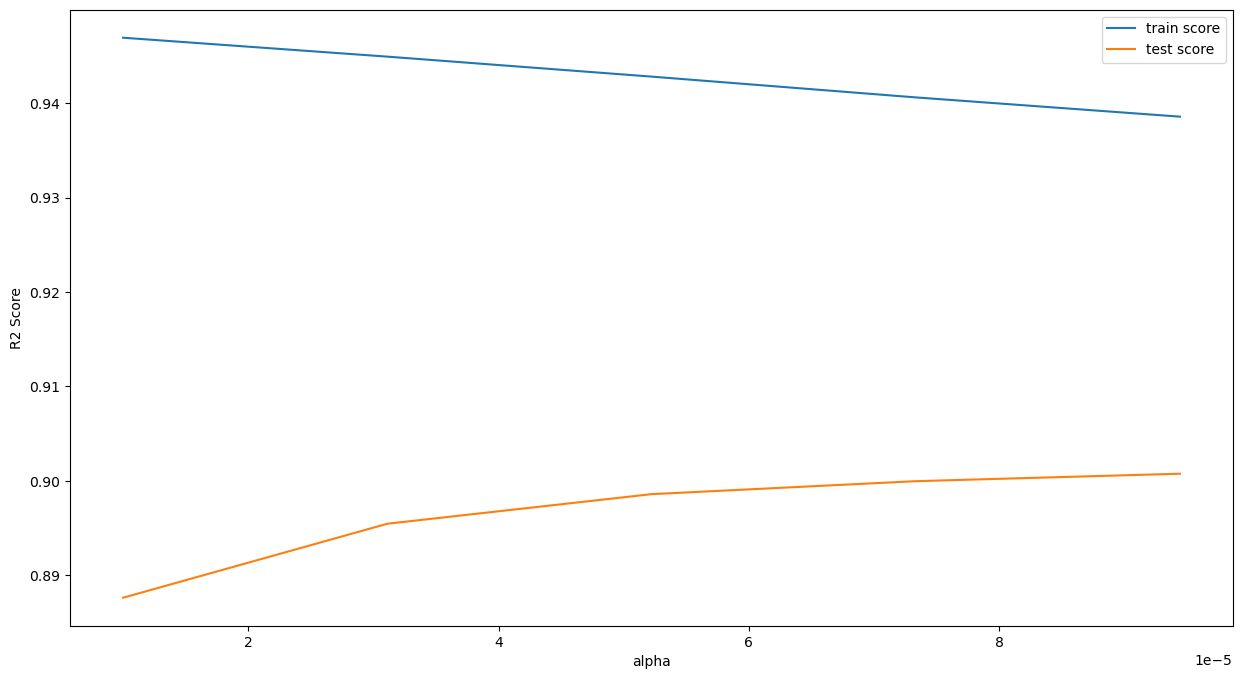

In [80]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
#Fitting Lasso model for best alpha and printing coefficients which have been penalised
best_alpha_lasso = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=best_alpha_lasso, random_state=100)

lasso.fit(X_train, y_train)

print("Lasso Intercept : ", lasso.intercept_)
print("Lasso Coefficient :\n", lasso.coef_)

Lasso Intercept :  0.17166114589305204
Lasso Coefficient :
 [ 3.54357211e-02  1.47558209e-01  6.60277024e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.51152709e-04  0.00000000e+00
  0.00000000e+00  6.01436444e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.02463466e-01  2.66614300e-03 -0.00000000e+00
  0.00000000e+00  1.40006193e-02  1.67198995e-02 -0.00000000e+00
  2.76680570e-02  3.07085809e-02 -0.00000000e+00  3.31179485e-02
  5.75980692e-02  7.20596529e-04 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.45635645e-02 -0.00000000e+00 -2.18992372e-02
  0.00000000e+00 -2.59385514e-02  7.10368687e-02  2.87628662e-02
  3.87714397e-02  1.80644013e-03 -2.29402729e-02  0.00000000e+00
 -0.00000000e+00  5.23530500e-04 -0.00000000e+00  3.55918536e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.19779817e-05
 -0.00000000e+00 -9.35648103e-03 -0.00000000e+00  0.00000000e+00
 -1.19115944e-01  7.08508571e-04  0.00000000e+00  0.00000000e+00
 -1.90448749e-02  0.00000000e+

In [82]:
# Lets calculate metrics : R2 score and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
lasso_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
lasso_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
lasso_metric.append(rmse_test_lr)

R2 Score (Train) :  0.9317902521378408
R2 Score (Test)  :  0.9109017184421319
RMSE (Train)     :  0.033830610253503514
RMSE (Test)      :  0.038232442080975114


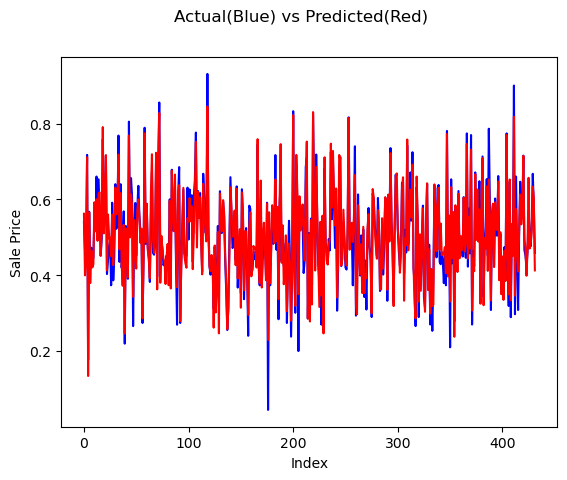

In [83]:
# Look how closely the actual and predicted values are in test data
index = [i for i in range(0,len(X_test),1)]
plt.plot(index,y_test, color="blue")
plt.plot(index,y_pred_test, color="red")
plt.suptitle('Actual(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.show()

In [84]:
#Displaing the co-efficients of the model in order
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso.coef_),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff.head(20)

Lasso Co-Efficient
GrLivArea                       0.202463
OverallQual                     0.147558
Total_floor_SF                  0.071037
OverallCond                     0.066028
TotalBsmtSF                     0.060144
GarageArea                      0.057598
Neighborhood_Crawfor            0.047280
Total_Bathrooms                 0.038771
LotArea                         0.035436
GarageCars                      0.033118
Neighborhood_StoneBr            0.032108
Fireplaces                      0.030709
Neighborhood_NridgHt            0.029012
Total_porch_sf                  0.028763
TotRmsAbvGrd                    0.027668
SaleType_ConLD                  0.026247
Exterior1st_BrkFace             0.024163
Neighborhood_NoRidge            0.020666
BsmtQual_Ex                     0.020257
Functional_Typ                  0.016984

---
---
<a id='conclusion'></a>
## Conclusion

#### Let's look at the metrics derived from Ridge and Lasso models

In [85]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)', 'RMSE (Train)','RMSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.938550          0.931790
1   R2 Score (Test)          0.897946          0.910902
2      RMSE (Train)          0.032111          0.033831
3       RMSE (Test)          0.040918          0.038232

---
#### Let's look at the number of features in Ridge and Lasso models

In [86]:
print("No. of features in the input data       : ", X_train.shape[1])

ridge_selected_features = ridge_coeff[ridge_coeff['Ridge Co-Efficient'] != 0]
print("No. of features selected by Ridge model : ", len(ridge_selected_features.index))

lasso_selected_features = lasso_coeff[lasso_coeff['Lasso Co-Efficient'] != 0]
print("No. of features selected by Lasso model : ", len(lasso_selected_features.index))

No. of features in the input data       :  301
No. of features selected by Ridge model :  298
No. of features selected by Lasso model :  123


---

#### Lets observe the changes in the coefficients between Ridge and Lasso models

In [87]:
# Creating a table which contain coefficients of features obtained from Ridge and Lasso models
betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

# Peek into the top 20 features just for example
betas.head(20)

Ridge     Lasso
LotArea       0.037856  0.035436
OverallQual   0.092293  0.147558
OverallCond   0.052950  0.066028
YearBuilt     0.016924  0.000000
YearRemodAdd  0.013163  0.000000
MasVnrArea    0.003300  0.000000
BsmtFinSF1    0.024752  0.000851
BsmtFinSF2    0.013087  0.000000
BsmtUnfSF     0.022601  0.000000
TotalBsmtSF   0.039934  0.060144
1stFlrSF      0.066231  0.000000
2ndFlrSF      0.043299  0.000000
LowQualFinSF  0.015372  0.000000
GrLivArea     0.063464  0.202463
BsmtFullBath  0.008184  0.002666
BsmtHalfBath -0.002854 -0.000000
FullBath      0.018587  0.000000
HalfBath      0.026125  0.014001
BedroomAbvGr  0.031855  0.016720
KitchenAbvGr -0.012286 -0.000000

---
#### Let's observe the top 20 features between Ridge and Lasso model

In [88]:
# Creating a table which contain features in the rank order obtained from Ridge and Lasso models
topFeatures = pd.DataFrame()

topFeatures['Ridge Features'] = ridge_coeff.index
topFeatures['Lasso Features'] = lasso_coeff.index

# Sample the top 20 features
topFeatures.head(20)

Ridge Features        Lasso Features
0            OverallQual             GrLivArea
1               1stFlrSF           OverallQual
2              GrLivArea        Total_floor_SF
3            OverallCond           OverallCond
4         Total_floor_SF           TotalBsmtSF
5             GarageArea            GarageArea
6           TotRmsAbvGrd  Neighborhood_Crawfor
7               2ndFlrSF       Total_Bathrooms
8   Neighborhood_Crawfor               LotArea
9            TotalBsmtSF            GarageCars
10               LotArea  Neighborhood_StoneBr
11  Neighborhood_StoneBr            Fireplaces
12            GarageCars  Neighborhood_NridgHt
13          BedroomAbvGr        Total_porch_sf
14  Neighborhood_NridgHt          TotRmsAbvGrd
15        SaleType_ConLD        SaleType_ConLD
16            Fireplaces   Exterior1st_BrkFace
17   Exterior1st_BrkFace  Neighborhood_NoRidge
18       Total_Bathrooms           BsmtQual_Ex
19              HalfBath        Functional_Typ

> We could see the following few features play important role *(no order)* in any of the model:
> - OverallQual
> - GrLivArea
> - Total_floor_SF
> - GarageArea
> - TotalBsmtSF
> - OverallCond
> - Neighborhood
> - Total_Bathrooms 
> - GarageCars
> - Fireplaces
> - BsmtQual
> - LotArea
> - Exterior1st_BrkFace

---
<a id='conclusion_summary'></a>
### Summary :

- Since it is evident that both the models *R2 score* is same around **0.93** for train data and same around **0.90** for test data and *RMSE value* is same around **0.033** for train data and same around **0.038** for test data, it is better to select a model which is **simple**.
- In that terms, **lasso model** does better job since it does feature selection which resulted in *123 features* whereas ridge model has *298 features* which is 175 features more than lasso model.

Top features in *rank order* from **lasso** model are :
> - GrLivArea
> - OverallQual
> - Total_floor_SF
> - OverallCond
> - TotalBsmtSF
> - GarageArea
> - Neighborhood
> - Total_Bathrooms
> - LotArea
> - GarageCars
> - Fireplaces
> - Total_porch_sf
> - TotRmsAbvGrd
> - SaleType
> - Exterior1st_BrkFace
> - BsmtQual
> - Functional

Also, all the above features have a *positive correlation* with the Sale Price.

---
---
---

<a id='subjective'></a>
# Subjective Questions - Assignment Part II

<a id='subjective_q1'></a>
## Question 1
#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [89]:
print("Optimal value for Ridge is ", str(best_alpha_ridge), " and Lasso is", str(best_alpha_lasso))

Optimal value for Ridge is  3.3333333333333335  and Lasso is 0.00015777777777777776


#### Double the Alpha values:

### Ridge

In [90]:
#Fitting Ridge model for double the optimum alpha and printing coefficients which have been penalised
alpha_double = 2 * best_alpha_ridge
ridge_double = Ridge(alpha=alpha_double, random_state=100)

ridge_double.fit(X_train, y_train)

Ridge(alpha=6.666666666666667, random_state=100)

In [91]:
# Lets calculate metrics : R2 score and RMSE
y_pred_train = ridge_double.predict(X_train)
y_pred_test = ridge_double.predict(X_test)

ridge_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
ridge_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
ridge_double_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
ridge_double_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
ridge_double_metric.append(rmse_test_lr)

R2 Score (Train) :  0.9332842646506145
R2 Score (Test)  :  0.8978091970661994
RMSE (Train)     :  0.033458059443411195
RMSE (Test)      :  0.0409452268039151


In [92]:
#Displaing the co-efficients of the model in order
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double.coef_),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: "Ridge Double Co-Efficient"},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Double Co-Efficient'], ascending=False,inplace=True)
ridge_double_coeff.head(20)

Ridge Double Co-Efficient
OverallQual                            0.077689
1stFlrSF                               0.057165
GrLivArea                              0.055084
Total_floor_SF                         0.046009
GarageArea                             0.044079
OverallCond                            0.043672
TotRmsAbvGrd                           0.042990
Neighborhood_Crawfor                   0.039334
2ndFlrSF                               0.038696
TotalBsmtSF                            0.038524
GarageCars                             0.036011
Neighborhood_StoneBr                   0.031023
LotArea                                0.029977
Total_Bathrooms                        0.029122
BedroomAbvGr                           0.027362
Neighborhood_NridgHt                   0.025962
Exterior1st_BrkFace                    0.025877
HalfBath                               0.025635
Fireplaces                             0.025378
Neighborhood_NoRidge                   0.025094

---

#### Let's look at the metrics derived from Optimal and Double Optimal values

In [93]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)', 'RMSE (Train)','RMSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
rdg_metric = pd.Series(ridge_double_metric, name = 'Ridge Double Regression')

final_metric = pd.concat([lr_metric, rg_metric, rdg_metric], axis = 1)

final_metric

Metric  Ridge Regression  Ridge Double Regression
0  R2 Score (Train)          0.938550                 0.933284
1   R2 Score (Test)          0.897946                 0.897809
2      RMSE (Train)          0.032111                 0.033458
3       RMSE (Test)          0.040918                 0.040945

---
#### Let's look at the number of features from Optimal and Double Optimal values

In [94]:
print("No. of features in the input data       : ", X_train.shape[1])

ridge_selected_features = ridge_coeff[ridge_coeff['Ridge Co-Efficient'] != 0]
print("No. of features selected by Ridge model : ", len(ridge_selected_features.index))

ridge_double_selected_features = ridge_double_coeff[ridge_double_coeff['Ridge Double Co-Efficient'] != 0]
print("No. of features selected by Ridge Double model : ", len(ridge_double_selected_features.index))

No. of features in the input data       :  301
No. of features selected by Ridge model :  298
No. of features selected by Ridge Double model :  298


---

#### Lets observe the changes in the coefficients between Optimal and Double Optimal values

In [95]:
# Creating a table which contain coefficients of features obtained from Optimal and Double Optimal values
betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Ridge Double'] = ridge_double.coef_

# Peek into the top 20 features just for example
betas.head(20)

Ridge  Ridge Double
LotArea       0.037856      0.029977
OverallQual   0.092293      0.077689
OverallCond   0.052950      0.043672
YearBuilt     0.016924      0.011705
YearRemodAdd  0.013163      0.013851
MasVnrArea    0.003300      0.007331
BsmtFinSF1    0.024752      0.024396
BsmtFinSF2    0.013087      0.010778
BsmtUnfSF     0.022601      0.022469
TotalBsmtSF   0.039934      0.038524
1stFlrSF      0.066231      0.057165
2ndFlrSF      0.043299      0.038696
LowQualFinSF  0.015372      0.011267
GrLivArea     0.063464      0.055084
BsmtFullBath  0.008184      0.007201
BsmtHalfBath -0.002854     -0.002798
FullBath      0.018587      0.021563
HalfBath      0.026125      0.025635
BedroomAbvGr  0.031855      0.027362
KitchenAbvGr -0.012286     -0.007440

---
#### Let's observe the top 20 features between Optimal and Double Optimal values

In [96]:
# Creating a table which contain features in the rank order obtained from Optimal and Double Optimal values
topFeatures = pd.DataFrame()

topFeatures['Ridge Features'] = ridge_coeff.index
topFeatures['Ridge Double Features'] = ridge_double_coeff.index

# Sample the top 20 features
topFeatures.head(20)

Ridge Features Ridge Double Features
0            OverallQual           OverallQual
1               1stFlrSF              1stFlrSF
2              GrLivArea             GrLivArea
3            OverallCond        Total_floor_SF
4         Total_floor_SF            GarageArea
5             GarageArea           OverallCond
6           TotRmsAbvGrd          TotRmsAbvGrd
7               2ndFlrSF  Neighborhood_Crawfor
8   Neighborhood_Crawfor              2ndFlrSF
9            TotalBsmtSF           TotalBsmtSF
10               LotArea            GarageCars
11  Neighborhood_StoneBr  Neighborhood_StoneBr
12            GarageCars               LotArea
13          BedroomAbvGr       Total_Bathrooms
14  Neighborhood_NridgHt          BedroomAbvGr
15        SaleType_ConLD  Neighborhood_NridgHt
16            Fireplaces   Exterior1st_BrkFace
17   Exterior1st_BrkFace              HalfBath
18       Total_Bathrooms            Fireplaces
19              HalfBath  Neighborhood_NoRidge

---
### Lasso

In [97]:
#Fitting Ridge model for double the optimum alpha and printing coefficients which have been penalised
alpha_double = 2 * best_alpha_lasso
lasso_double = Lasso(alpha=alpha_double, random_state=100)

lasso_double.fit(X_train, y_train)

Lasso(alpha=0.0003155555555555555, random_state=100)

In [98]:
# Lets calculate metrics : R2 score and RMSE
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

lasso_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
lasso_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
lasso_double_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
lasso_double_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
lasso_double_metric.append(rmse_test_lr)

R2 Score (Train) :  0.9219656161502184
R2 Score (Test)  :  0.9110473581494112
RMSE (Train)     :  0.036185086287855966
RMSE (Test)      :  0.03820118200018934


In [99]:
#Displaing the co-efficients of the model in order
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double.coef_),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: "Lasso Double Co-Efficient"},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Double Co-Efficient'], ascending=False,inplace=True)
lasso_double_coeff.head(20)

Lasso Double Co-Efficient
GrLivArea                              0.178241
OverallQual                            0.159259
TotalBsmtSF                            0.071032
Total_floor_SF                         0.070841
GarageArea                             0.056132
OverallCond                            0.054041
Total_Bathrooms                        0.045389
Neighborhood_Crawfor                   0.041109
GarageCars                             0.040525
Total_porch_sf                         0.025839
TotRmsAbvGrd                           0.025329
Fireplaces                             0.023922
Neighborhood_NridgHt                   0.023602
BsmtQual_Ex                            0.020790
Exterior1st_BrkFace                    0.019619
LotArea                                0.016681
Neighborhood_StoneBr                   0.016666
Neighborhood_NoRidge                   0.015633
BsmtExposure_Gd                        0.015188
Functional_Typ                         0.013797

---

#### Let's look at the metrics derived from Optimal and Double Optimal values

In [100]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)', 'RMSE (Train)','RMSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

lg_metric = pd.Series(lasso_metric, name = 'Lasso Regression')
ldg_metric = pd.Series(lasso_double_metric, name = 'Lasso Double Regression')

final_metric = pd.concat([lr_metric, lg_metric, ldg_metric], axis = 1)

final_metric

Metric  Lasso Regression  Lasso Double Regression
0  R2 Score (Train)          0.931790                 0.921966
1   R2 Score (Test)          0.910902                 0.911047
2      RMSE (Train)          0.033831                 0.036185
3       RMSE (Test)          0.038232                 0.038201

---
#### Let's look at the number of features in Optimal and Double Optimal values

In [101]:
print("No. of features in the input data       : ", X_train.shape[1])

lasso_selected_features = lasso_coeff[lasso_coeff['Lasso Co-Efficient'] != 0]
print("No. of features selected by Lasso model : ", len(lasso_selected_features.index))

lasso_double_selected_features = lasso_double_coeff[lasso_double_coeff['Lasso Double Co-Efficient'] != 0]
print("No. of features selected by Lasso Double model : ", len(lasso_double_selected_features.index))

No. of features in the input data       :  301
No. of features selected by Lasso model :  123
No. of features selected by Lasso Double model :  88


---

#### Lets observe the changes in the coefficients between Optimal and Double Optimal values

In [102]:
# Creating a table which contain coefficients of features obtained from Optimal and Double Optimal values
betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Lasso'] = lasso.coef_
betas['Lasso Double'] = lasso_double.coef_

# Peek into the top 20 features just for example
betas.head(20)

Lasso  Lasso Double
LotArea       0.035436      0.016681
OverallQual   0.147558      0.159259
OverallCond   0.066028      0.054041
YearBuilt     0.000000      0.000000
YearRemodAdd  0.000000      0.000000
MasVnrArea    0.000000      0.000000
BsmtFinSF1    0.000851      0.001689
BsmtFinSF2    0.000000      0.000000
BsmtUnfSF     0.000000      0.000000
TotalBsmtSF   0.060144      0.071032
1stFlrSF      0.000000      0.000000
2ndFlrSF      0.000000      0.000000
LowQualFinSF  0.000000      0.000000
GrLivArea     0.202463      0.178241
BsmtFullBath  0.002666      0.000000
BsmtHalfBath -0.000000     -0.000000
FullBath      0.000000      0.000000
HalfBath      0.014001      0.011043
BedroomAbvGr  0.016720      0.000000
KitchenAbvGr -0.000000     -0.000000

---
#### Let's observe the top 20 features between Optimal and Double Optimal values

In [103]:
# Creating a table which contain features in the rank order obtained from Optimal and Double Optimal values
topFeatures = pd.DataFrame()

topFeatures['Lasso Features'] = lasso_coeff.index
topFeatures['Lasso Double Features'] = lasso_double_coeff.index

# Sample the top 20 features
topFeatures.head(20)

Lasso Features Lasso Double Features
0              GrLivArea             GrLivArea
1            OverallQual           OverallQual
2         Total_floor_SF           TotalBsmtSF
3            OverallCond        Total_floor_SF
4            TotalBsmtSF            GarageArea
5             GarageArea           OverallCond
6   Neighborhood_Crawfor       Total_Bathrooms
7        Total_Bathrooms  Neighborhood_Crawfor
8                LotArea            GarageCars
9             GarageCars        Total_porch_sf
10  Neighborhood_StoneBr          TotRmsAbvGrd
11            Fireplaces            Fireplaces
12  Neighborhood_NridgHt  Neighborhood_NridgHt
13        Total_porch_sf           BsmtQual_Ex
14          TotRmsAbvGrd   Exterior1st_BrkFace
15        SaleType_ConLD               LotArea
16   Exterior1st_BrkFace  Neighborhood_StoneBr
17  Neighborhood_NoRidge  Neighborhood_NoRidge
18           BsmtQual_Ex       BsmtExposure_Gd
19        Functional_Typ        Functional_Typ

---
<a id='subjective_q3'></a>
## Question 3
#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The five important variables from the lasso model are:
> - GrLivArea
> - OverallQual
> - Total_floor_SF
> - OverallCond
> - TotalBsmtSF

Let's remove those and create another model

In [104]:
# Drop the top 5 features
X_train_drop = X_train.drop(columns=['GrLivArea', 'OverallQual', 'Total_floor_SF', 'OverallCond', 'TotalBsmtSF'], axis=1)
X_test_drop = X_test.drop(columns=['GrLivArea', 'OverallQual', 'Total_floor_SF', 'OverallCond', 'TotalBsmtSF'], axis=1)

In [105]:
# Create a Lasso model instance
lasso_drop = Lasso(random_state=100)

# cross validation
lasso_drop_model_cv = GridSearchCV(estimator = lasso_drop, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

lasso_drop_model_cv.fit(X_train_drop, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(lasso_drop_model_cv.best_params_)

{'alpha': 0.0001}


In [107]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso_drop = Lasso(alpha=alpha, random_state=100)

lasso_drop.fit(X_train_drop, y_train)

Lasso(alpha=0.0001, random_state=100)

In [108]:
# Lets calculate metrics : R2 score and RMSE
y_pred_train = lasso_drop.predict(X_train_drop)
y_pred_test = lasso_drop.predict(X_test_drop)

lasso_drop_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
lasso_drop_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
lasso_drop_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
lasso_drop_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
lasso_drop_metric.append(rmse_test_lr)

R2 Score (Train) :  0.9300089684965083
R2 Score (Test)  :  0.8903144598905034
RMSE (Train)     :  0.03426950306181058
RMSE (Test)      :  0.042420136768733206


In [109]:
#Displaing the co-efficients of the model in order
lasso_drop_coeff = pd.DataFrame(np.atleast_2d(lasso_drop.coef_),columns=X_train_drop.columns)
lasso_drop_coeff = lasso_drop_coeff.T
lasso_drop_coeff.rename(columns={0: "Lasso Drop Co-Efficient"},inplace=True)
lasso_drop_coeff.sort_values(by=['Lasso Drop Co-Efficient'], ascending=False,inplace=True)
lasso_drop_coeff.head(20)

Lasso Drop Co-Efficient
1stFlrSF                             0.222495
2ndFlrSF                             0.116437
GarageArea                           0.072284
Neighborhood_Crawfor                 0.052715
Neighborhood_StoneBr                 0.044194
SaleType_ConLD                       0.041093
Total_Bathrooms                      0.039269
LotArea                              0.037647
Neighborhood_NridgHt                 0.036140
Fireplaces                           0.034845
Total_porch_sf                       0.034698
GarageQual_Ex                        0.033966
BsmtQual_Ex                          0.032972
GarageCars                           0.031718
BedroomAbvGr                         0.028940
Neighborhood_NoRidge                 0.028745
ExterCond_Ex                         0.028471
Functional_Typ                       0.027108
YearRemodAdd                         0.026832
BsmtFinSF1                           0.025626

The new five important variables from the lasso model after dropping the previous top five predictors are:
> - 1stFlrSF
> - 2ndFlrSF
> - GarageArea
> - Neighborhood
> - SaleType

---
---
---